# 绘图和可视化

进行信息丰富的可视化（有时称为绘图）是数据分析中最重要的任务之一。它可能是探索过程的一部分，例如，帮助识别异常值或所需的数据转换，或作为生成模型想法的方式。 对于其他人而言，为网页构建交互式可视化可能是最终目标。 Python有许多用于进行静态或动态可视化的附加库，但我将主要关注matplotlib及其基础上的库。

matplotlib是一个桌面绘图软件包，旨在创建（主要是二维的）出版质量的绘图。该项目由John Hunter于2002年启动，旨在在Python中启用类似于MATLAB的绘图界面。matplotlib和IPython社区已经合作简化了IPython shell（现在是Jupyter笔记本）中的交互式绘图。matplotlib在所有操作系统上都支持各种GUI后端，并且还可以将可视化导出到所有常见的矢量和栅格图形格式（PDF，SVG，JPG，PNG，BMP，GIF等）。除了一些图表外，本书中几乎所有图形都是使用matplotlib制作的。

随着时间的推移，matplotlib催生了许多用于数据可视化的附加工具箱，这些工具箱使用matplotlib进行基础绘图。其中之一是seaborn，我们将在本章后面探讨。

遵循本章中的代码示例的最简单方法是在Jupyter笔记本中使用交互式绘图。要进行设置，请在Jupyter笔记本中执行以下语句：

In [1]:
%matplotlib notebook

## 9.1 简单的matplotlib API入门

对于matplotlib，我们使用以下导入约定：

In [2]:
import matplotlib.pyplot as plt
import numpy as np

data = np.arange(10)

In [3]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

<IPython.core.display.Javascript object>


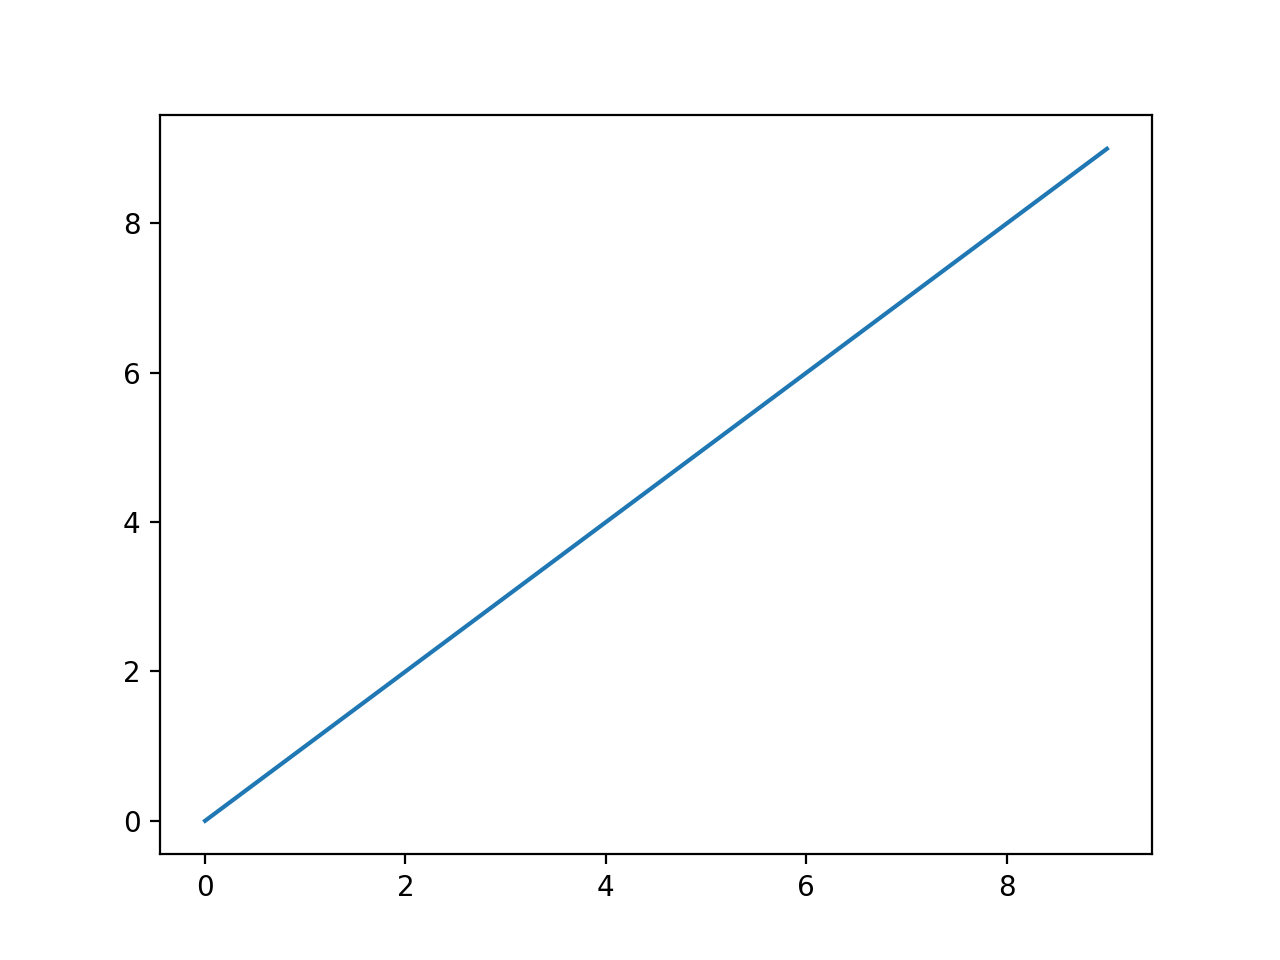

In [4]:
plt.plot(data)

虽然像seaborn和pandas的内置绘图功能之类的库将处理制作绘图的许多普通细节，但如果您希望在提供的功能选项之外对其进行自定义，则需要了解有关matplotlib API的一些知识。

> 注意：书中没有足够的空间来全面讨论matplotlib中功能的广度和深度。足以教您如何起床并运行。 matplotlib库和文档是学习高级功能的最佳资源。

### 图和子图

matplotlib中的图位于Figure对象中。您可以使用plt.figure来创建一个新的图：

<IPython.core.display.Javascript object>


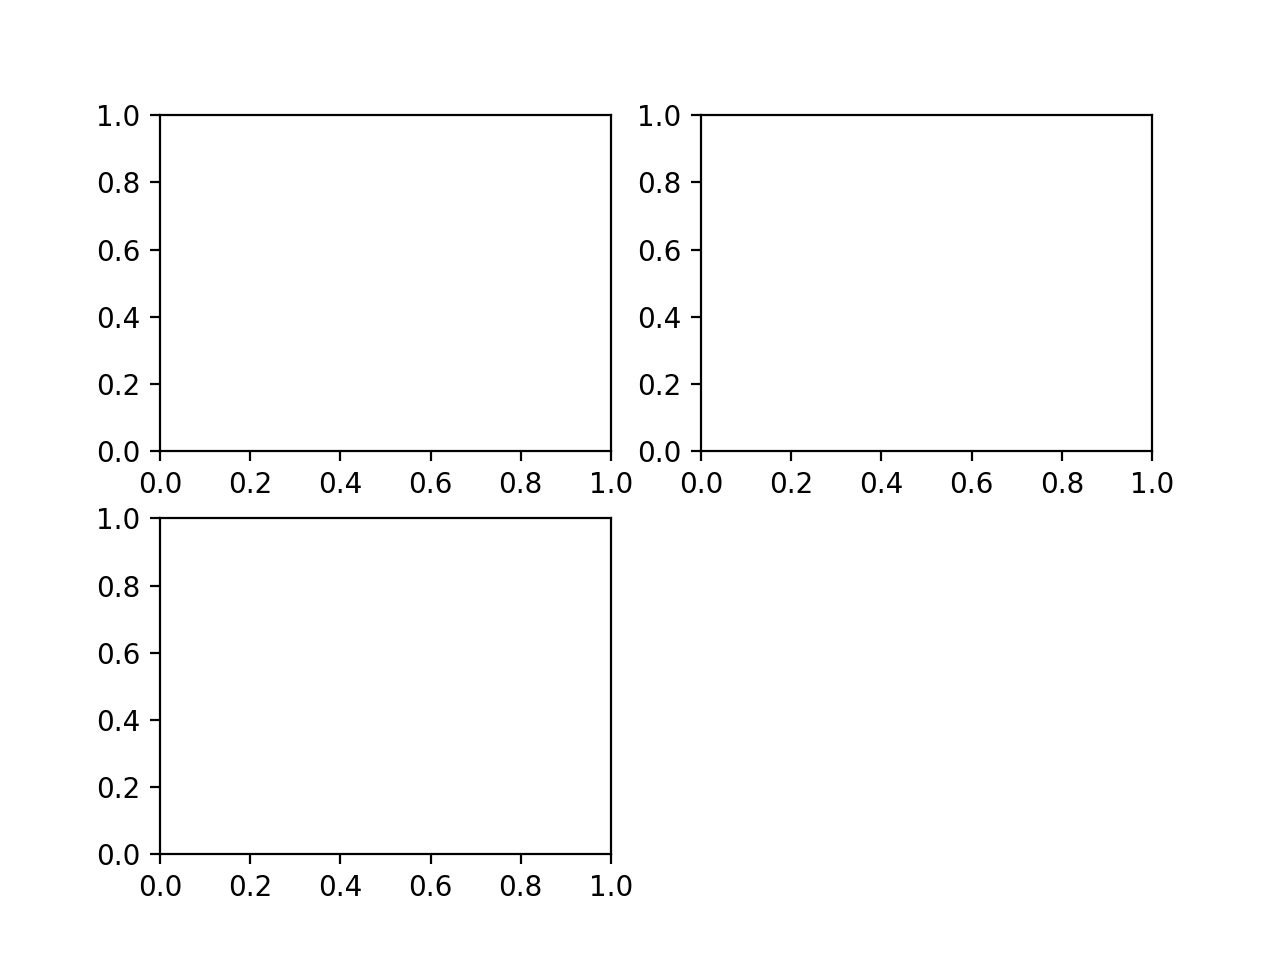

In [5]:
fig = plt.figure()

在IPython中，将出现一个空的绘图窗口，但是在Jupyter中，直到我们使用更多命令之前，什么都不会显示。plt.figure有很多选择；值得注意的是，如果将其保存到磁盘，figsize将保证该图形具有一定的尺寸和纵横比。

您无法使用空白图形进行绘图。您必须使用add_subplot创建一个或多个子图：

In [6]:
ax1 = fig.add_subplot(2, 2, 1)

这意味着该图应为2×2（总共最多四个图），并且我们选择四个子图中的第一个（从1编号）。如果创建接下来的两个子图，最终将得到如图9-2所示的可视化效果：

In [7]:
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

> 注意：使用Jupyter笔记本的一个细微差别是，在评估了每个单元格之后便会重设绘图，因此对于更复杂的绘图，必须将所有绘图命令放在单个笔记本电脑单元中。

在这里，我们在同一单元格中运行所有这些命令：

<IPython.core.display.Javascript object>


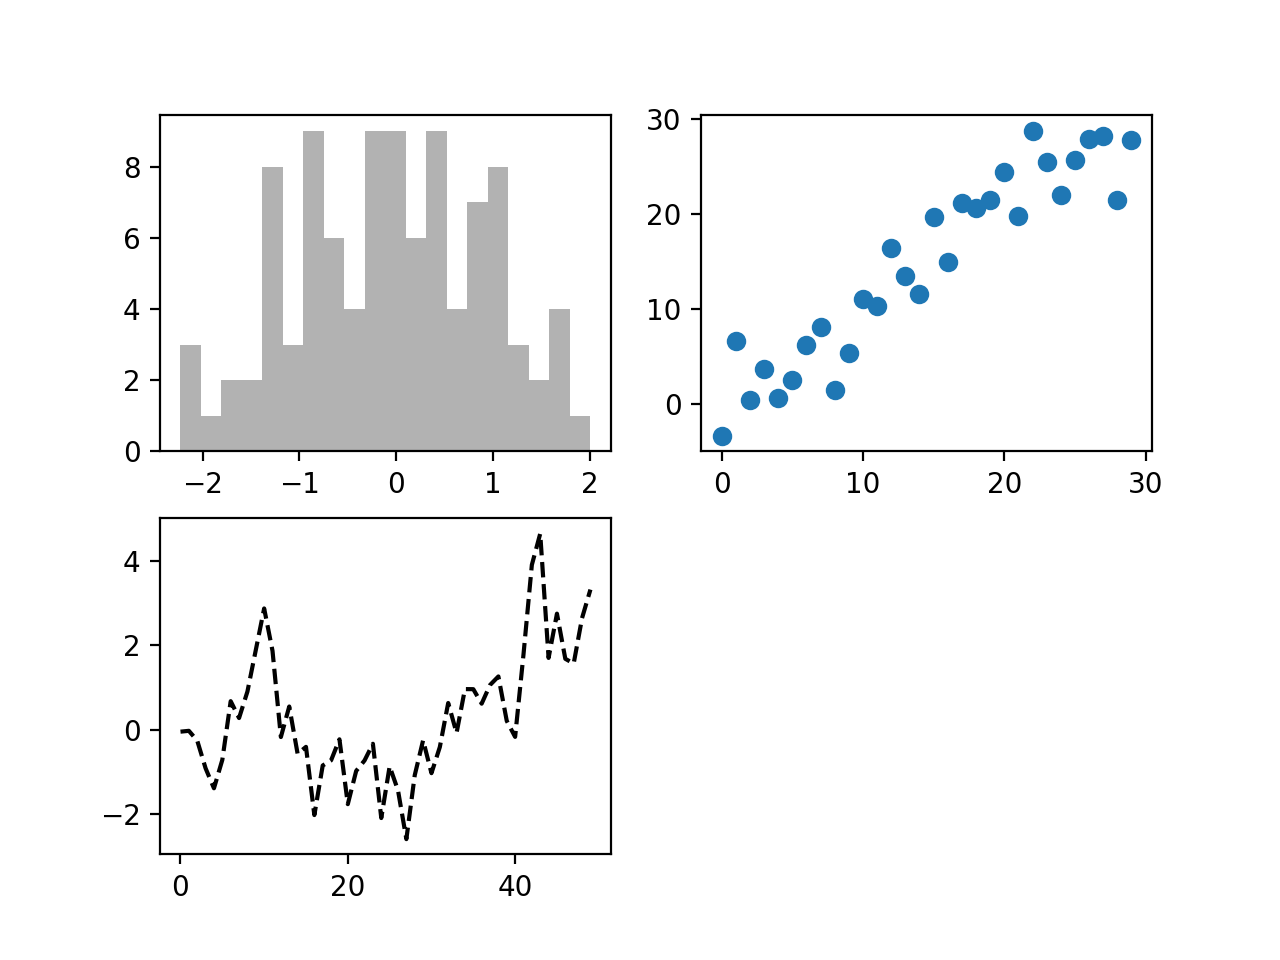

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

发出诸如plt.plot([1.5，3.5，-2，1.6])之类的绘图命令时，matplotlib会使用最后使用的图形和子图（如有必要，创建一个子图），从而隐藏图形和子图的创建。 因此，如果我们添加以下命令，您将得到如图9-3所示的内容：

In [9]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

'k--'是一种样式选项，指示matplotlib绘制黑色虚线。这里由fig.add_subplot返回的对象是AxesSubplot对象，可以通过调用每个对象的实例方法直接在其上绘制其他空子图（见图9-4）：

In [10]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [11]:
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

您可以在matplotlib文档中找到完整的绘图类型目录。

用子图网格创建图形是一项非常常见的任务，因此matplotlib包含一个便捷方法plt.subplots，该方法创建一个新图并返回一个包含创建的子图对象的NumPy数组：

<IPython.core.display.Javascript object>


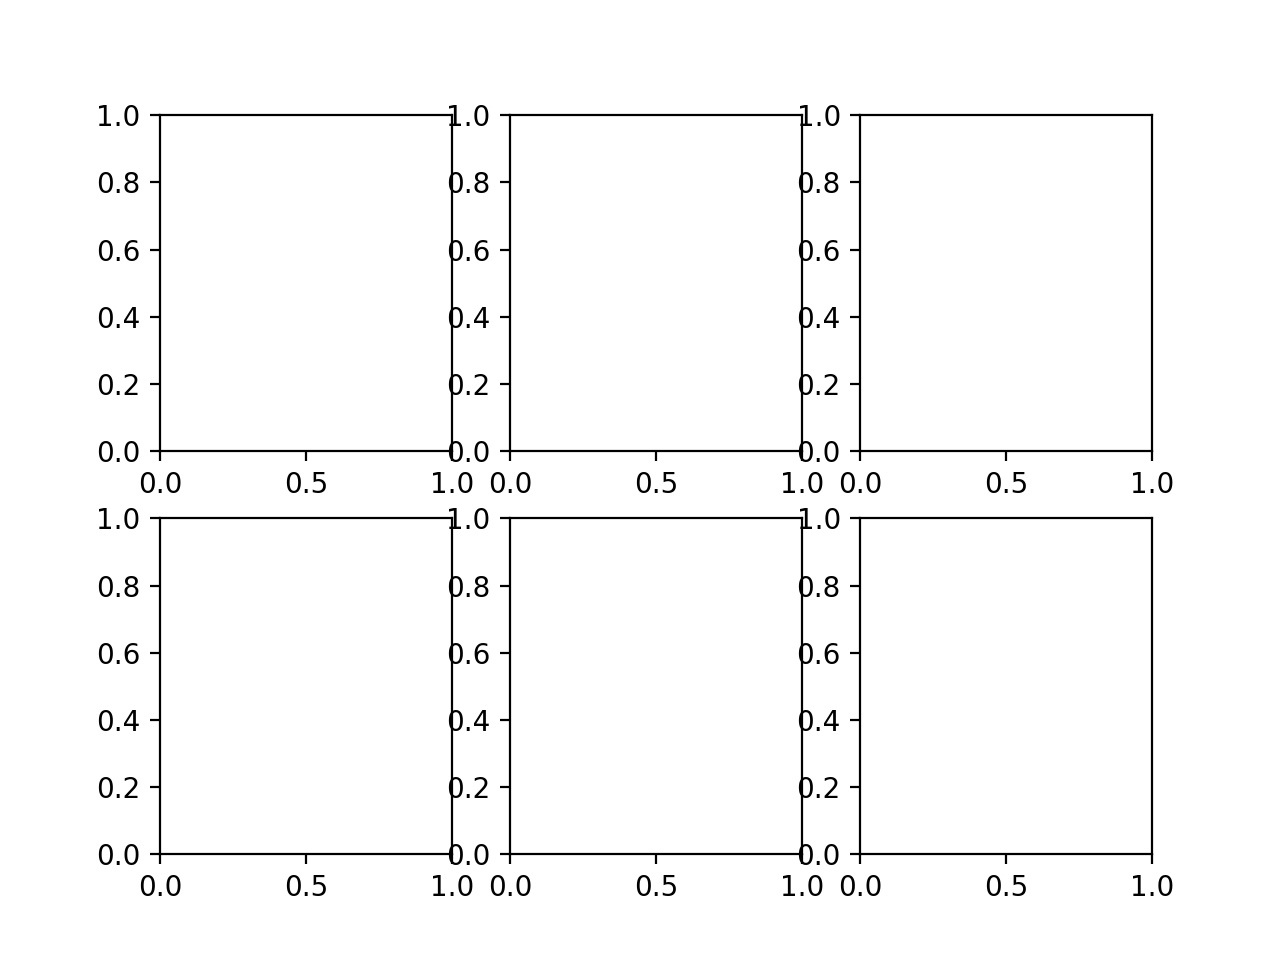

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd86db85fd0>,
      dtype=object)

In [12]:
fig, axes = plt.subplots(2, 3)

axes

这非常有用，因为axes数组可以像二维数组一样轻松地索引； 例如，axes[0, 1]。 您还可以使用sharex和sharey分别指示子图具有相同的x轴或y轴。当您比较相同规模的数据时，此功能特别有用；否则，matplotlib将自动缩放绘图限制。有关此方法的更多信息，请参见表9-1。


#### 调整子图周围的间距

默认情况下，matplotlib在子图的外部和子图之间的间距周围留有一定数量的填充。相对于图的高度和宽度均指定了该间距，因此，如果您使用GUI窗口以编程方式或手动调整图的大小，则图将自动进行调整。您可以使用Figure对象上的subplots_adjust方法来更改间距，该方法也可以作为顶层函数使用：

```python
    subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=None, hspace=None)
```

wspace和hspace分别控制图形宽度和图形高度的百分比，以用作子图之间的间距。这是一个小示例，其中我将间距一直缩小到零（见图9-5）：

<IPython.core.display.Javascript object>


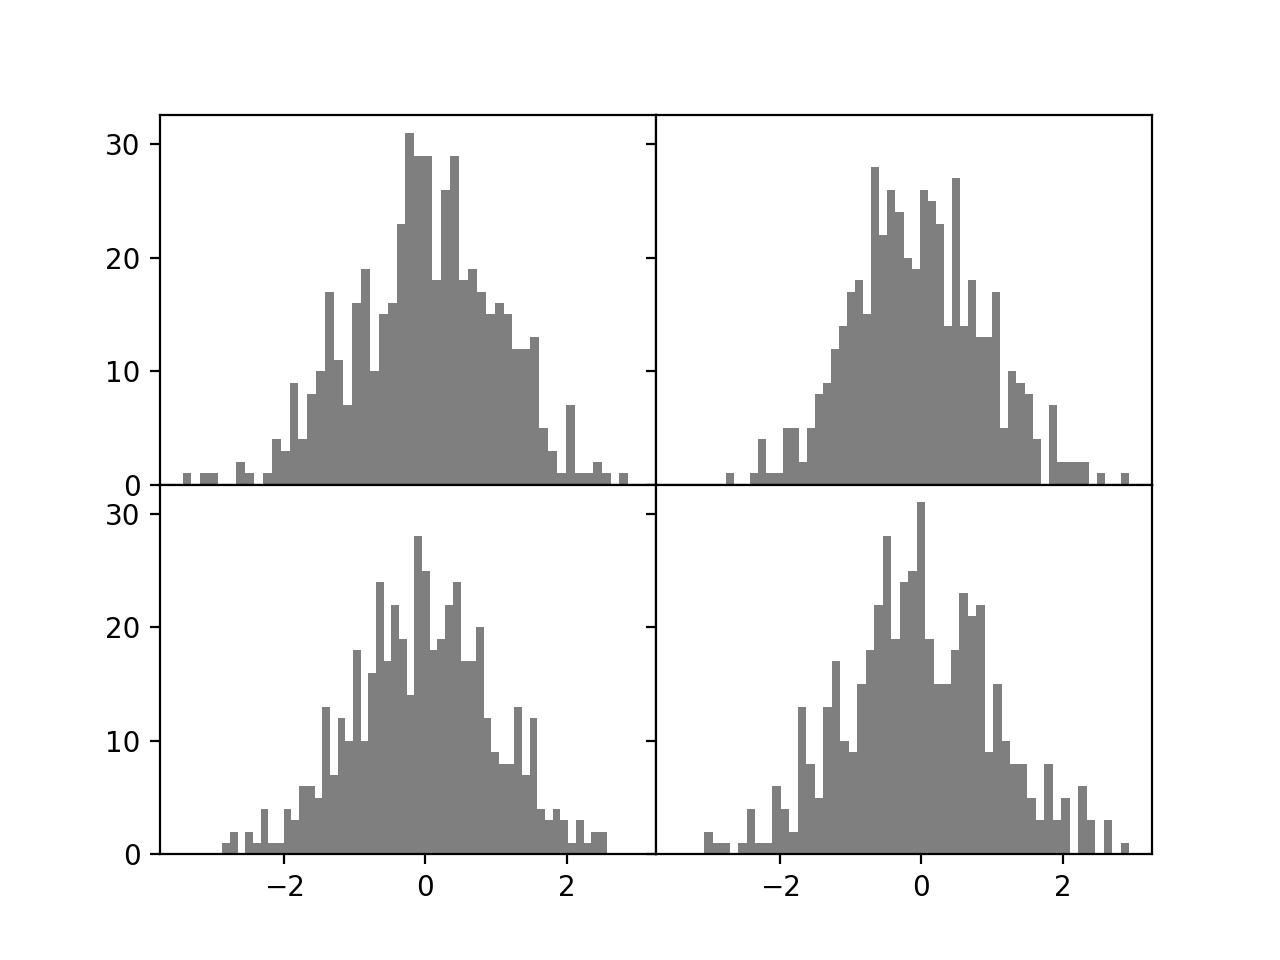

In [13]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

您可能会注意到轴标签重叠。matplotlib不会检查标签是否重叠，因此在这种情况下，您需要自己指定明确的刻度位置和刻度标签来修复标签（我们将在以下部分中介绍如何操作）。

### 颜色，标记和线条样式

Matplotlib的主要绘图功能接受x和y坐标数组，并可以选择表示颜色和线条样式的字符串缩写。例如，要绘制带有绿色破折号的x对y，可以执行以下命令：

```python
    ax.plot(x, y, 'g--')
```

为方便起见，提供了在字符串中同时指定颜色和线条样式的这种方式；在实践中，如果您以编程方式创建图，则可能不希望将字符串混合在一起以创建具有所需样式的图。同一图也可以更明确地表示为：

```python
    ax.plot(x, y, linestyle='--', color='g')
```

常用颜色提供了多种颜色缩写，但是您可以通过指定其十六进制代码（例如'#CECECE'）在光谱上使用任何颜色。您可以通过查看图的文档字符串（在IPython或Jupyter中使用plot？）来查看整套线型。

线图还可以具有标记以突出显示实际数据点。 由于matplotlib创建了在点之间插值的连续线图，因此有时可能不清楚点在哪里。 标记可以是样式字符串的一部分，该字符串必须具有颜色，然后是标记类型和线条样式（请参见图9-6）：

<IPython.core.display.Javascript object>


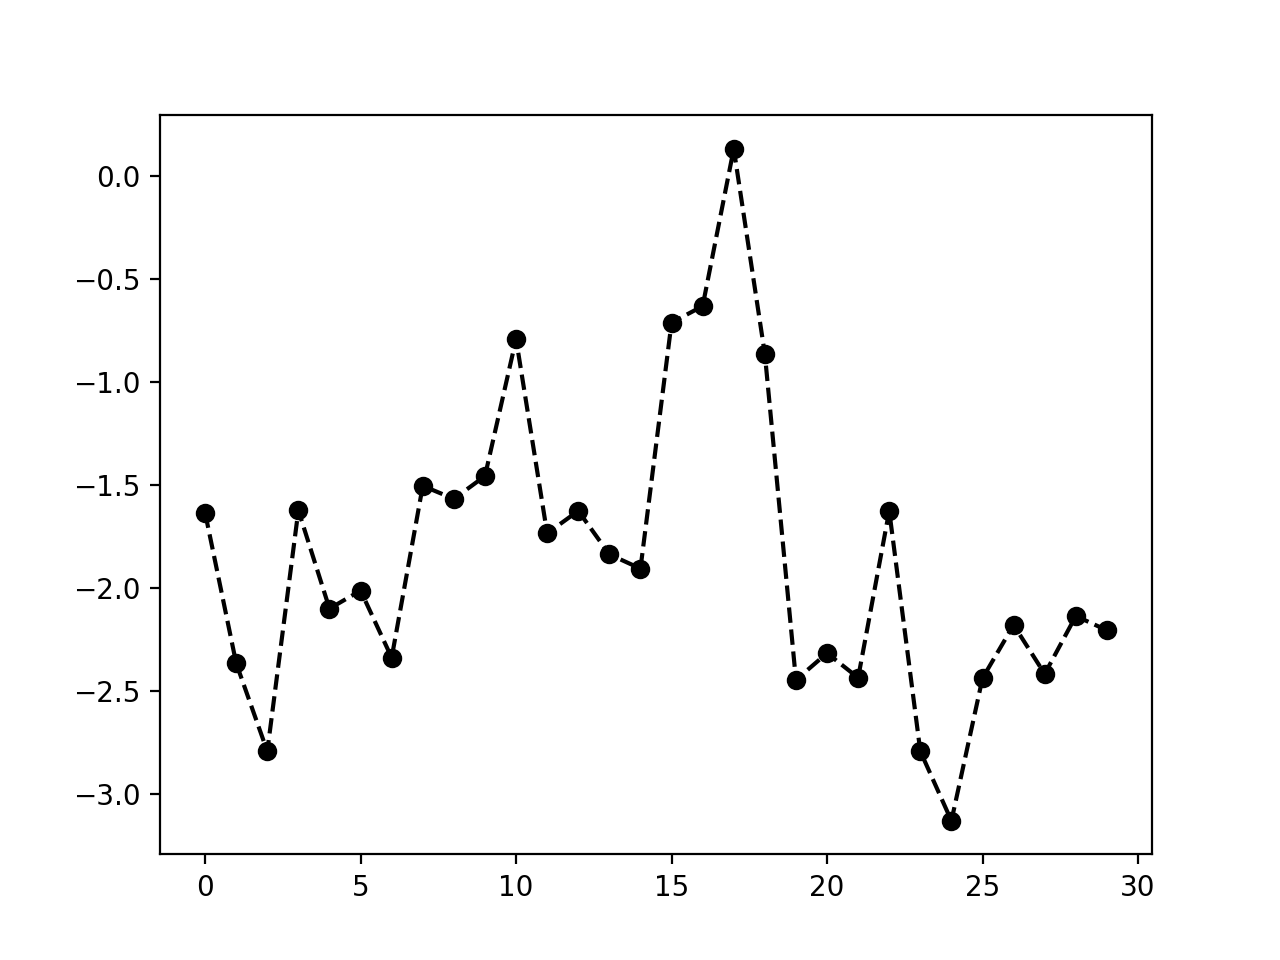

In [14]:
plt.plot(np.random.randn(30).cumsum(), 'ko--')

这也可以更明确地写为：

```python
    plot(np.random.randn(30).cumsum(), color='k', linestyle='dashed', marker='o')
```

对于线图，您会注意到默认情况下后续点是线性插值的。可以使用drawstyle选项对此进行更改（图9-7）：

In [15]:
data = np.random.randn(30).cumsum()

<IPython.core.display.Javascript object>


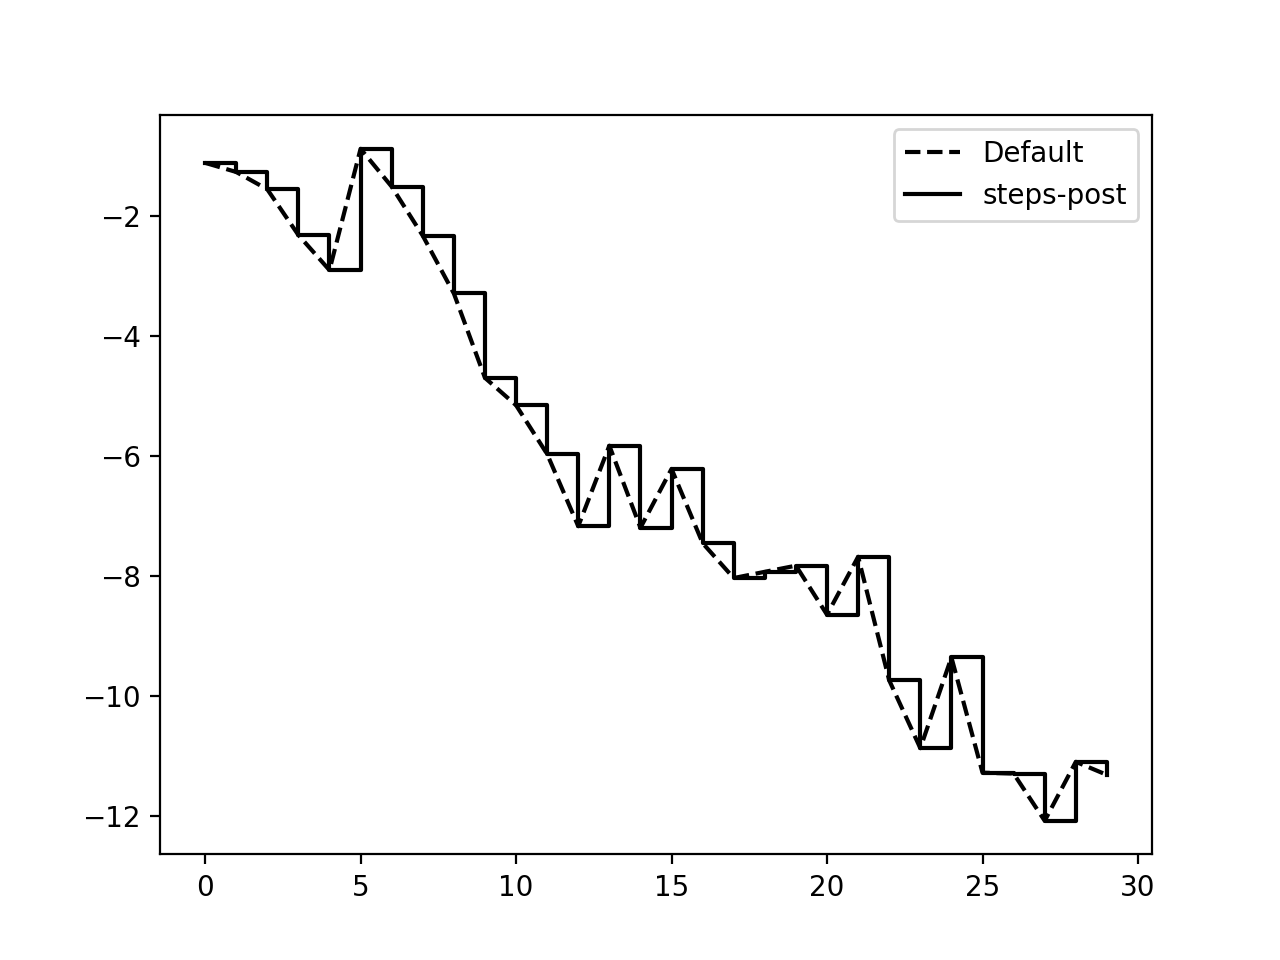

In [16]:
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

运行此命令时，您可能会注意到类似<matplotlib.lines.Line2D at ...>的输出。 matplotlib返回引用刚添加的图子组件的对象。很多时候，您可以放心地忽略此输出。在这里，由于我们将标签参数传递给绘图，因此我们能够创建绘图图例以使用plt.legend标识每条线。

> 注意：无论是否在绘制数据时传递了标签选项，都必须调用plt.legend（或ax.legend，如果您有轴的引用）来创建图例。

### 刻度，标签和图例

对于大多数类型的绘图装饰，主要有两种处理方法：使用面向过程的pyplot接口（即matplotlib.pyplot）和面向对象的本机matplotlib API。

pyplot界面旨在供交互式使用，由xlim，xticks和xticklabels之类的方法组成。这些分别控制绘图范围，刻度位置和刻度标签。它们可以以两种方式使用：

- 调用时不带参数返回当前参数值（例如，plt.xlim（）返回当前x轴绘图范围）
- 用参数调用可设置参数值（例如plt.xlim（[0，10]），将x轴范围设置为0到10）

所有这些方法都作用于活动的或最近创建的AxesSubplot。它们每个都对应于子图对象本身上的两个方法。对于xlim，它们是ax.get_xlim和ax.set_xlim。我更愿意自己使用subplot实例方法，以便明确（特别是在处理多个子图时），但是您当然可以使用任何更方便的方法。

#### 设置标题，轴标签，刻度和刻度标签

为了说明如何自定义轴，我将创建一个简单的图形和随机游走图（请参见图9-8）：

<IPython.core.display.Javascript object>


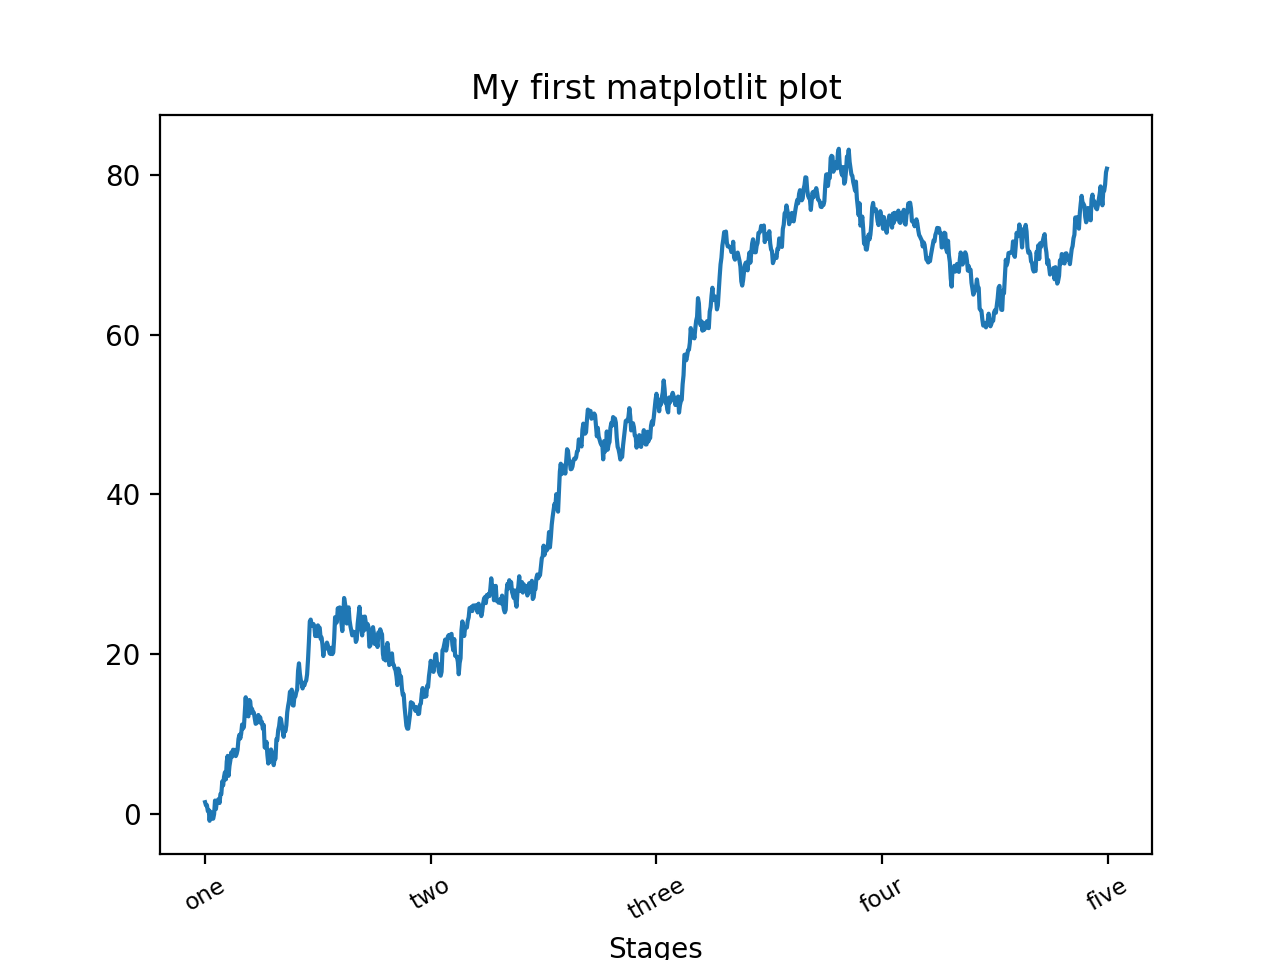

In [18]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

要更改x轴刻度，最简单的方法是使用set_xticks和set_xticklabel。前者指示matplotlib沿着数据范围在哪里放置刻度线；默认情况下，这些位置也将成为标签。但是我们可以使用set_xticklabels将其他任何值设置为标签：

In [19]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [20]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')

旋转选项将x刻度标签设置为30度旋转。最后，set_xlabel为x轴命名，set_title为子图标题（结果图见图9-9）：

In [21]:
ax.set_title('My first matplotlib plot')

Text(0.5, 1, 'My first matplotlib plot')

In [23]:
ax.set_xlabel('Stages')

Text(0.5, 24.188360157402354, 'Stages')

修改y轴包含相同的过程，在上述步骤中将y替换为x。axes类有一个set方法，该方法允许批量设置图属性。从前面的示例中，我们还可以编写：

In [24]:
props = {
    'title': 'My first matplotlit plot',
    'xlabel': 'Stages'
}
ax.set(**props)

[Text(0.5, 24.188360157402354, 'Stages'),
 Text(0.5, 1, 'My first matplotlit plot')]

#### 添加图例

图例是用于识别绘图元素的另一个关键元素。有两种添加方法。最简单的方法是在添加每幅图时传递label参数：

In [25]:
from numpy.random import randn

# fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

完成此操作后，您可以调用ax.legend（）或plt.legend（）自动创建图例。结果图如图9-10所示：

In [31]:
ax.legend(loc='best')

图例方法还有其他几个用于loc loc参数的选择。有关更多信息，请参见文档字符串（使用ax.legend？）。

loc告诉matplotlib放置绘图的位置。 如果您不挑剔，最好选择“最佳”，因为它会选择最远离的位置。 要从图例中排除一个或多个元素，请不要传递label或label ='_nolegend_'。

### 子图上的标注和绘图

除了标准绘图类型外，您可能还希望绘制自己的绘图标注，该注释可以由文本，箭头或其他形状组成。您可以使用 text，arrow 和 annotate 函数添加标注和文本。text使用可选的自定义样式在绘图上的给定坐标（x，y）上绘制文本：

```python
    ax.text(x, y, 'Hello World', family='monospace', fontsize=10)
```

标注可以绘制适当排列的文本和箭头。例如，让我们绘制自2007年以来的标准普尔500指数收盘价（从Yahoo! Finance获得），并用2008-2009年金融危机的一些重要日期进行注释。您可以在Jupyter笔记本的单个单元中最轻松地重现此代码示例。结果请参见图9-11：

<IPython.core.display.Javascript object>


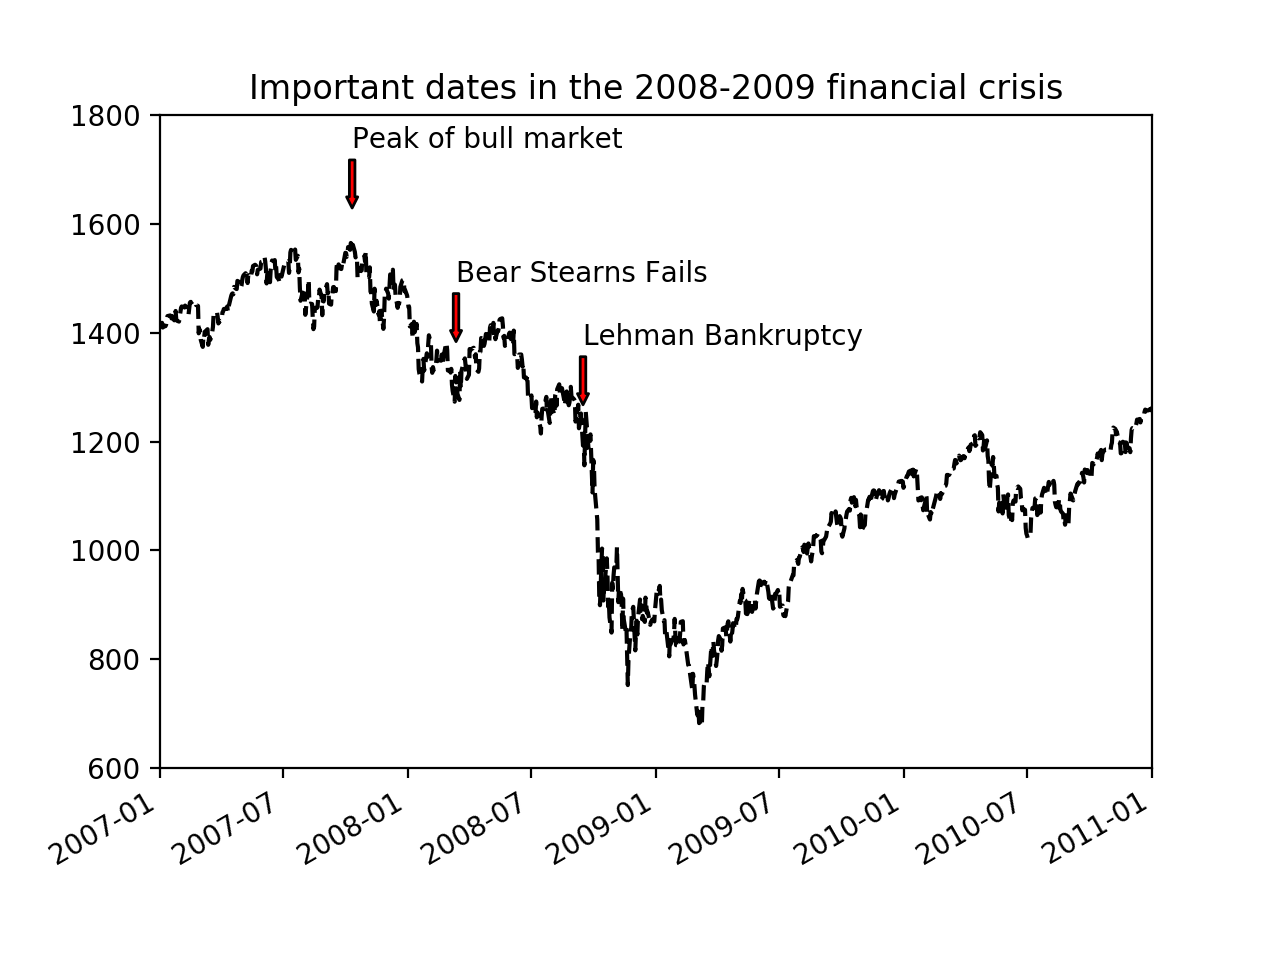

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [42]:
from datetime import datetime
import pandas as pd

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k--')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
               arrowprops=dict(facecolor='red', headwidth=4, width=2, headlength=4),
               horizontalalignment='left', verticalalignment='top')
    
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

此图中有两个要点要突出显示：ax.annotate方法可以在指示的x和y坐标处绘制标签。我们使用set_xlim和set_ylim方法手动设置绘图的开始和结束边界，而不是使用matplotlib的默认边界。最后，ax.set_title将主标题添加到绘图中。

有关更多标注示例的信息，请参见在线matplotlib画廊。

绘制形状需要多加注意。matplotlib的对象代表许多常见的形状，称为补丁。其中的一些，例如Rectangle和Circle，可以在matplotlib.pyplot中找到，但完整的集合位于matplotlib.patches中。

要将图形添加到绘图中，请创建补丁对象shp并通过调用ax.add_patch（shp）将其添加到子绘图中（请参见图9-12）：

<IPython.core.display.Javascript object>


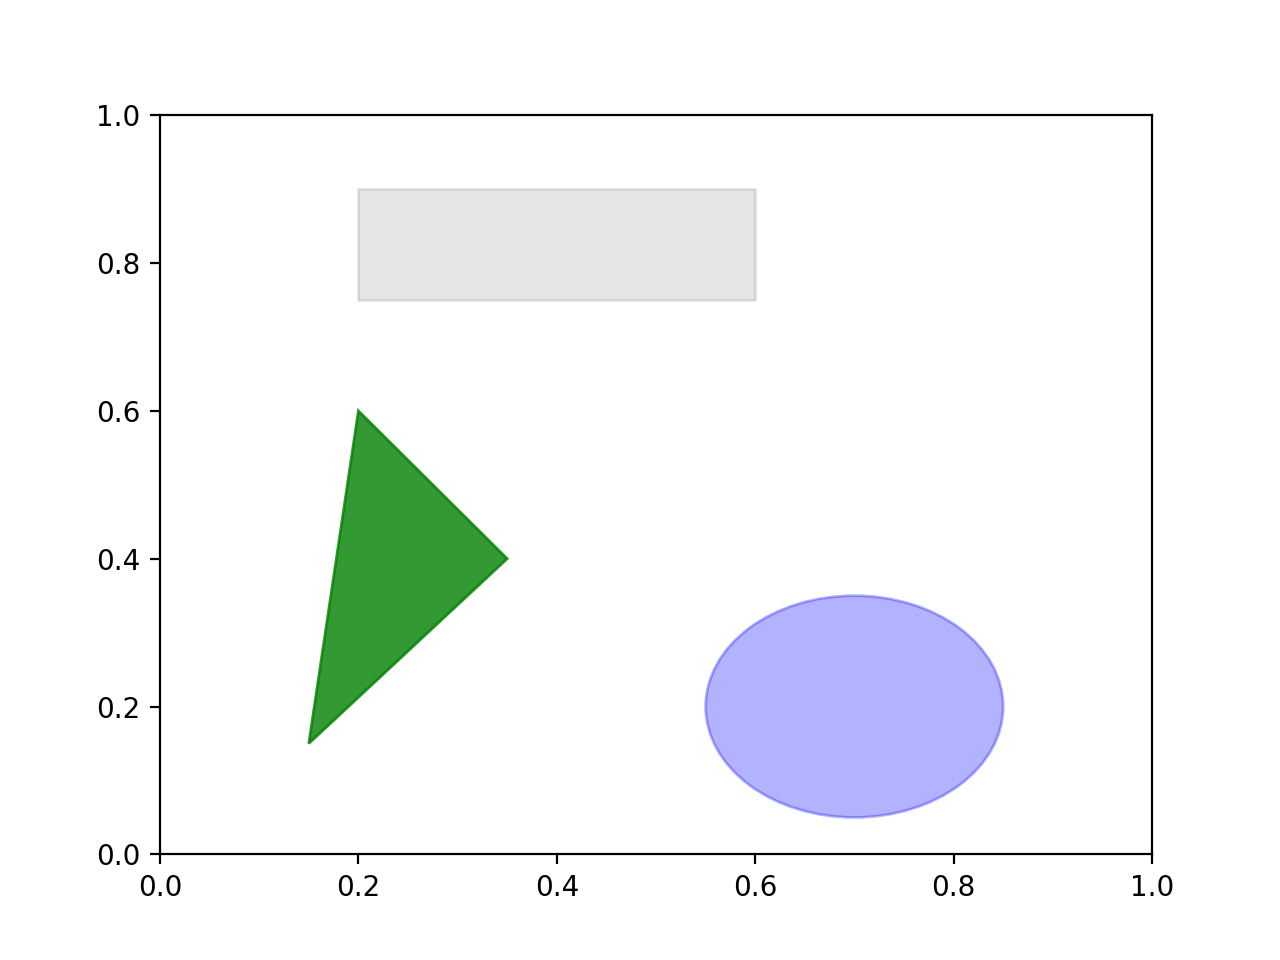

In [49]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.1)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.8)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

如果查看许多熟悉的图类型的实现，您会发现它们是由补丁组装而成的。

### 将绘图保存为文件

您可以使用plt.savefig将活动图形保存到文件中。此方法等效于图形对象的savefig实例方法。例如，要保存图形的SVG版本，只需键入：

```python
    plt.savefig('figpath.svg')
```

文件类型是从文件扩展名推断的。因此，如果您改用.pdf，则会得到PDF。我经常使用两个重要的选项来发布图形：dpi（用于控制每英寸点数的分辨率）和bbox_inches（可以在实际图形周围修剪空白）。要获得与PNG相同的图，并且在图周围且DPI为400 DPI时具有最小的空白，您可以执行以下操作：

```python
    plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
```

savefig不必写入磁盘；它也可以写入任何类似文件的对象，例如BytesIO：

```python
    from io import BytesIO
    buffer = BytesIO()
    plt.savefig(buffer)
    plot_data = buffer.getvalue()
```

有关savefig的其他一些选项的列表，请参见表9-2。

### matplotlib 配置项

matplotlib配置有配色方案和默认设置，主要用于准备要发布的图形。幸运的是，几乎所有的默认行为都可以通过一组广泛的全局参数来自定义，这些参数控制图形大小，子图间距，颜色，字体大小，网格样式等。从Python以编程方式修改配置的一种方法是使用rc方法。例如，要将全局默认图形大小设置为10×10，可以输入：

```python
    plt.rc('figure', figsize=(10, 10))
```

rc的第一个参数是您希望自定义的组件，例如“ figure”，“ axes”，“ xtick”，“ ytick”，“ grid”，“ legend”或许多其他组件。之后，可以跟随一系列指示新参数的关键字参数。写下程序中选项的一种简单方法是：

```python
    font_options = {'family': 'monospace',
                    'weight': 'bold',
                    'size': 'small'}
    plt.rc('font', **font_options)
```

为了进行更广泛的自定义并查看所有选项的列表，matplotlib随附了matplotlib/mpl-data目录中的配置文件matplotlibrc。如果您自定义此文件并将其放置在名为.matplotlibrc的主目录中，则每次使用matplotlib时都会加载该文件。

正如我们将在下一节中看到的那样，seaborn软件包具有几个内置的绘图主题或样式，这些主题或样式内部使用了matplotlib的配置系统。

## 9.2 使用pandas和seaborn绘图

matplotlib可能是一个相当底层的工具。您可以根据其基本组成部分来组装图：数据显示（即图的类型：线，条，框，散点图，轮廓线等），图例，标题，刻度标签和其他注释。

在pandas中，我们可能有多列数据以及行和列标签。pandas本身具有内置方法，可简化从DataFrame和Series对象创建可视化对象的过程。另一个库是seaborn，这是由Michael Waskom创建的统计图形库。Seaborn简化了许多常见可视化类型的创建。

> 注意: 导入seaborn会修改默认的matplotlib配色方案和情节样式，以提高可读性和美观性。 即使您不使用seaborn API，您也可能更喜欢将seaborn导入为一种改善一般matplotlib图的视觉美感的简单方法。

### 线图

Series和DataFrame都有一个plot属性，用于创建一些基本的plot类型。默认情况下，plot（）会绘制线图（请参见图9-13）：

<IPython.core.display.Javascript object>


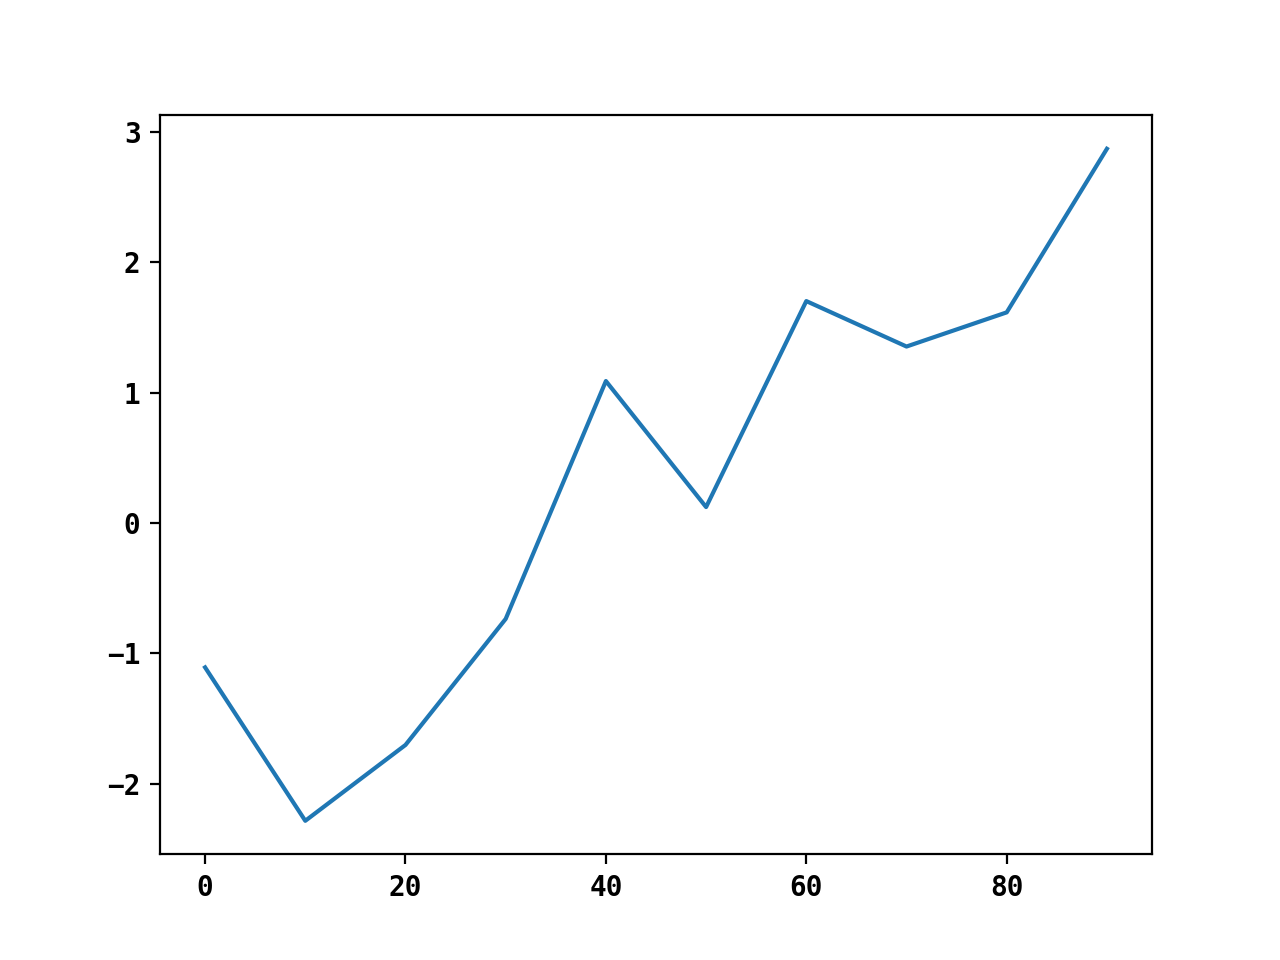

In [55]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

尽管可以通过传递use_index = False来禁用它，但Series对象的索引会传递到matplotlib以便在x轴上进行绘制。可以使用xticks和xlim选项调整x轴刻度和限制，分别使用yticks和ylim调整y轴。有关图选项的完整列表，请参见表9-3。在本节中，我将对其中的一些内容进行评论，其余的部分留给您探索。

大多数pandas的绘图方法都接受一个可选的ax参数，该参数可以是matplotlib子图对象。这使您可以在网格布局中更灵活地放置子图。

DataFrame的plot方法将其每一列绘制为同一子图上的不同线，并自动创建图例（见图9-14）：

<IPython.core.display.Javascript object>


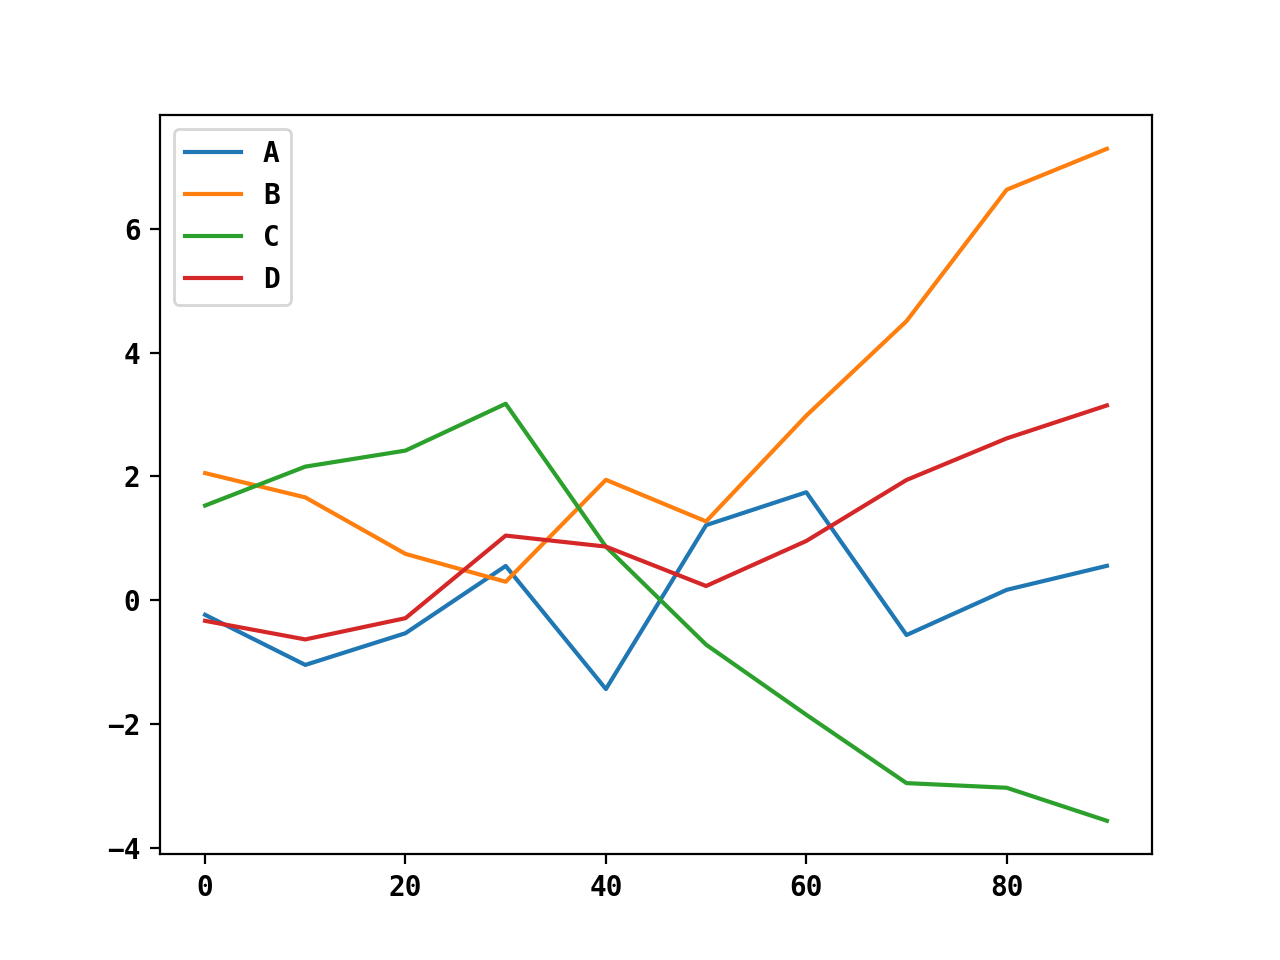

In [56]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot()

plot属性包含用于不同图类型的方法的“族”。例如，df.plot（）等效于df.plot.line（）。接下来，我们将探讨其中一些方法。

> 注意: 绘图的其他关键字参数将传递到相应的matplotlib绘图函数，因此您可以通过了解有关matplotlib API的更多信息来进一步自定义这些绘图。

DataFrame有许多选项，允许在如何处理列方面有一定的灵活性。例如，将它们全部绘制在同一子图上还是创建单独的子图。 有关这些的更多信息，请参见表9-4。

### 柱图

plot.bar（）和plot.barh（）分别绘制垂直和水平条形图。在这种情况下，Series或DataFrame索引将用作x（竖线）或y（竖线）的刻度（见图9-15）：

<IPython.core.display.Javascript object>


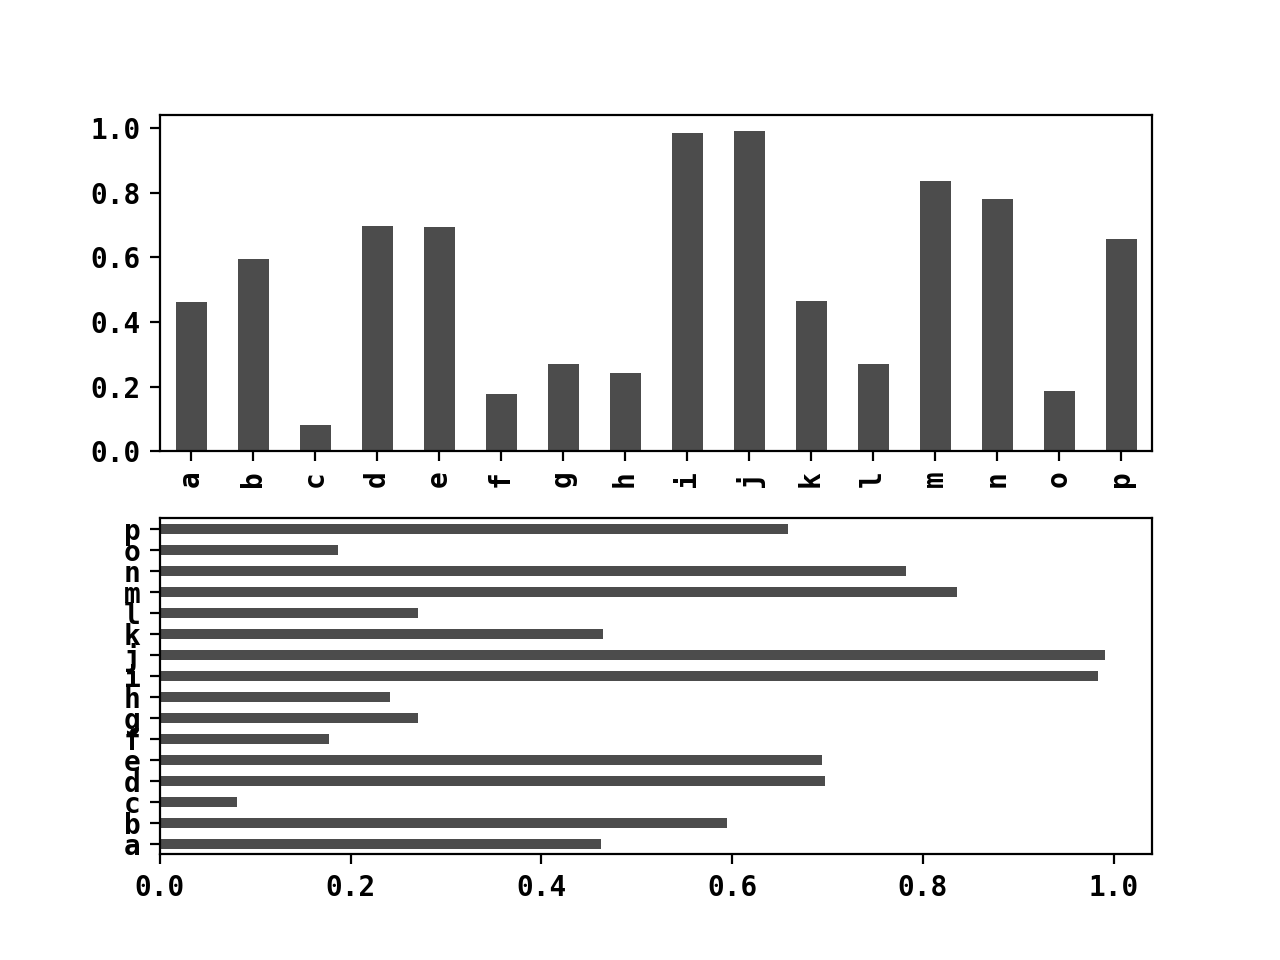

In [63]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

选项color ='k'和alpha = 0.7将图的颜色设置为黑色，并在填充上使用部分透明性。

使用DataFrame时，柱图将每个行中的值并排成一组，以条形形式并排显示每个值。 请参阅图9-16：

In [71]:
df = pd.DataFrame(np.random.rand(6, 4), index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))

In [72]:
df

Genus,A,B,C,D
one,0.729654,0.419847,0.161124,0.983361
two,0.588957,0.930579,0.663890,0.201396
three,0.498807,0.052265,0.899505,0.259954
four,0.259442,0.301477,0.934341,0.008632
five,0.884574,0.320323,0.835985,0.355821
six,0.320082,0.974860,0.016759,0.644196


<IPython.core.display.Javascript object>


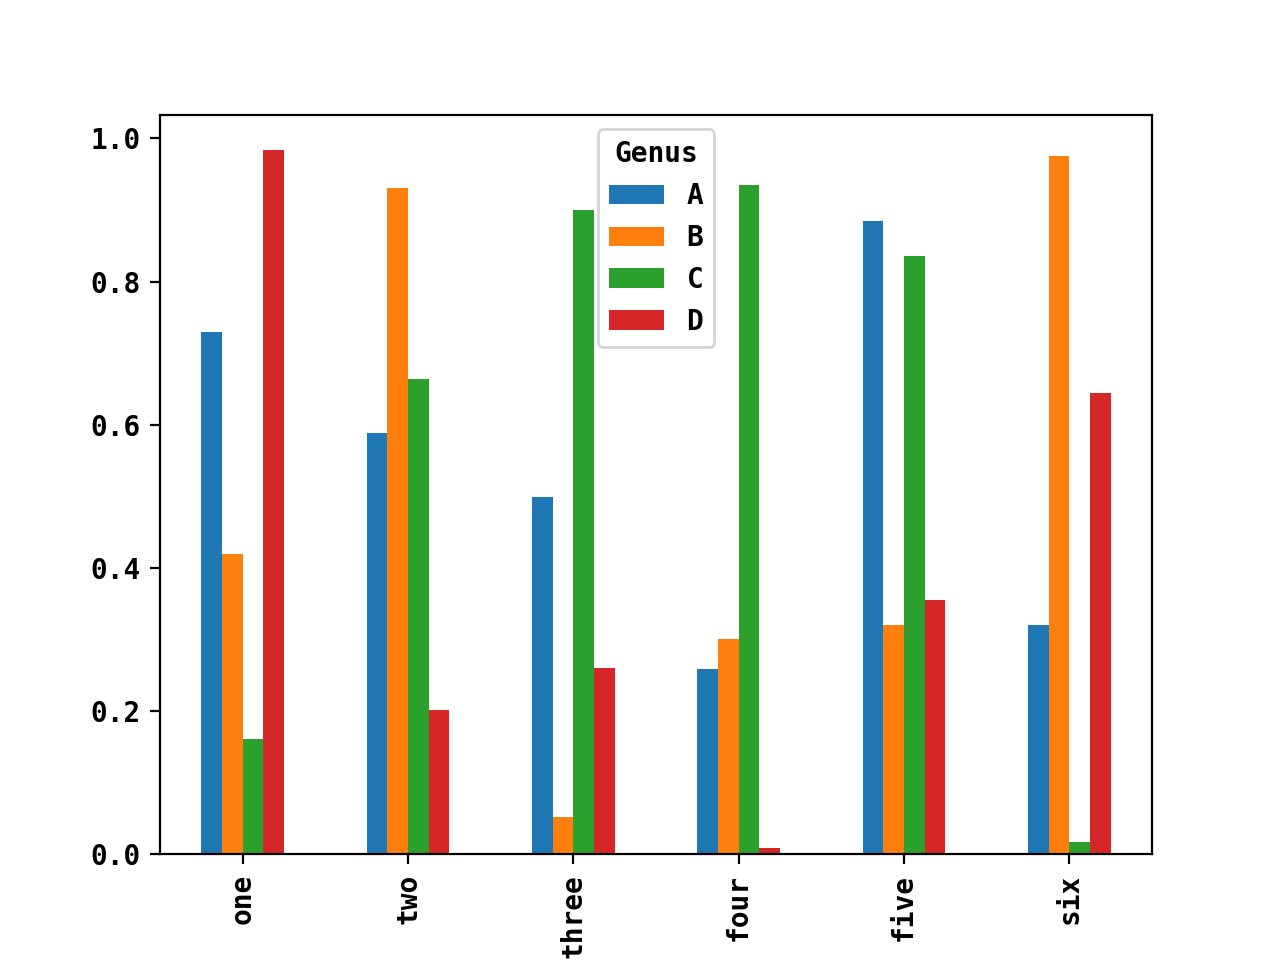

In [75]:
df.plot.bar()

请注意，DataFrame列上的名称“ Genus”用于为图例添加标题。

我们通过传递stacked = True从DataFrame创建堆叠的条形图，从而将每一行中的值堆叠在一起（见图9-17）：

<IPython.core.display.Javascript object>


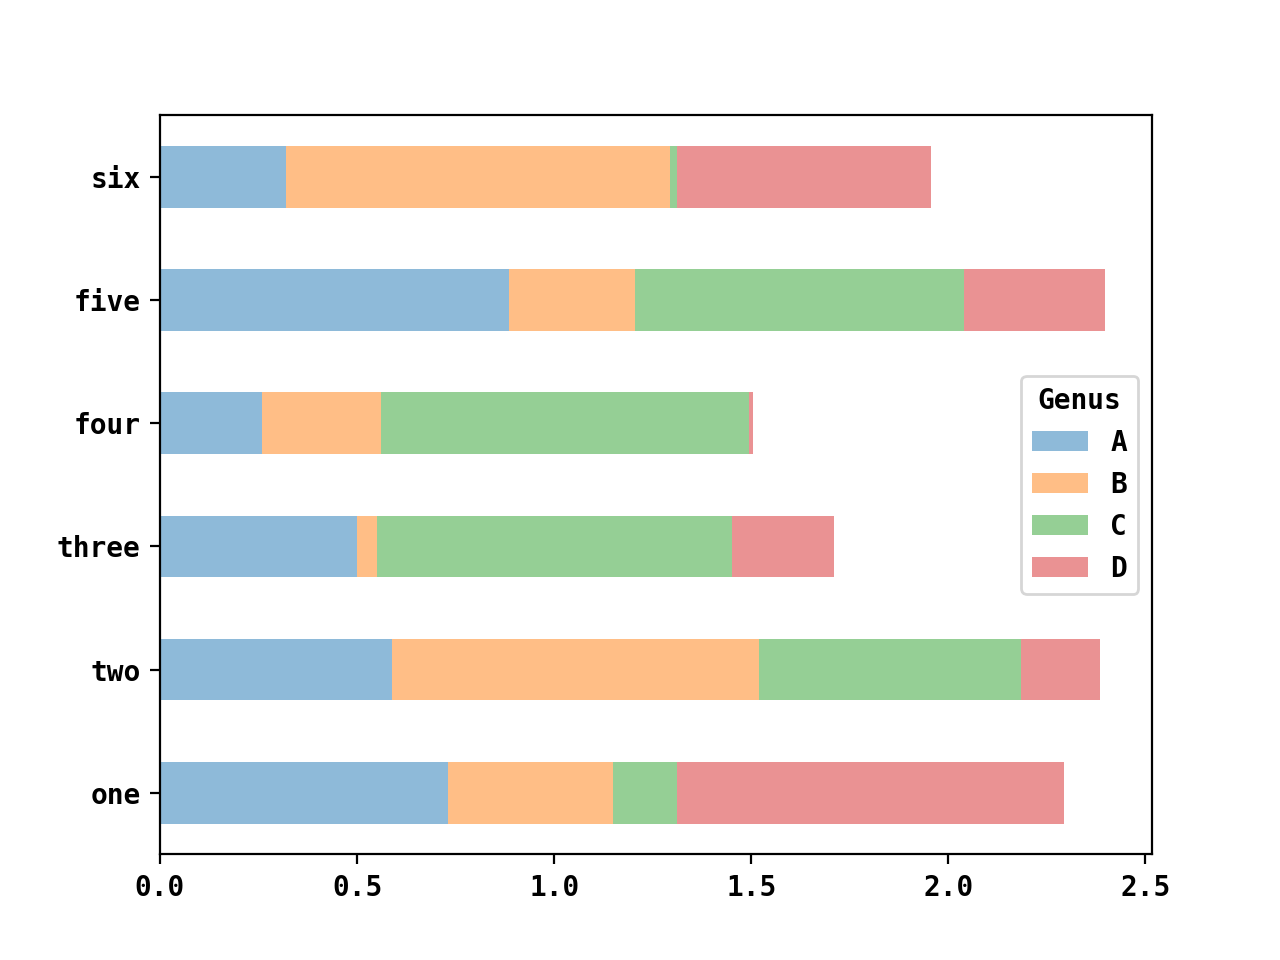

In [76]:
df.plot.barh(stacked=True, alpha=0.5)

> 注意：条形图的一个有用配方是使用value_counts：s.value_counts（）。plot.bar（）可视化系列的值频率。

返回到本书前面使用的小费数据集，假设我们想要制作一个堆叠的条形图，以显示每天每一方规模的数据点的百分比。 我使用read_csv加载数据，并按日期和聚会人数进行交叉制表：

In [78]:
tips = pd.read_csv('examples/tips.csv')

party_counts = pd.crosstab(tips['day'], tips['size'])

In [79]:
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [80]:
party_counts = party_counts.loc[:, 2:5]

然后，进行归一化，以使每一行的总和为1，并绘制出图（见图9-18）：

In [82]:
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


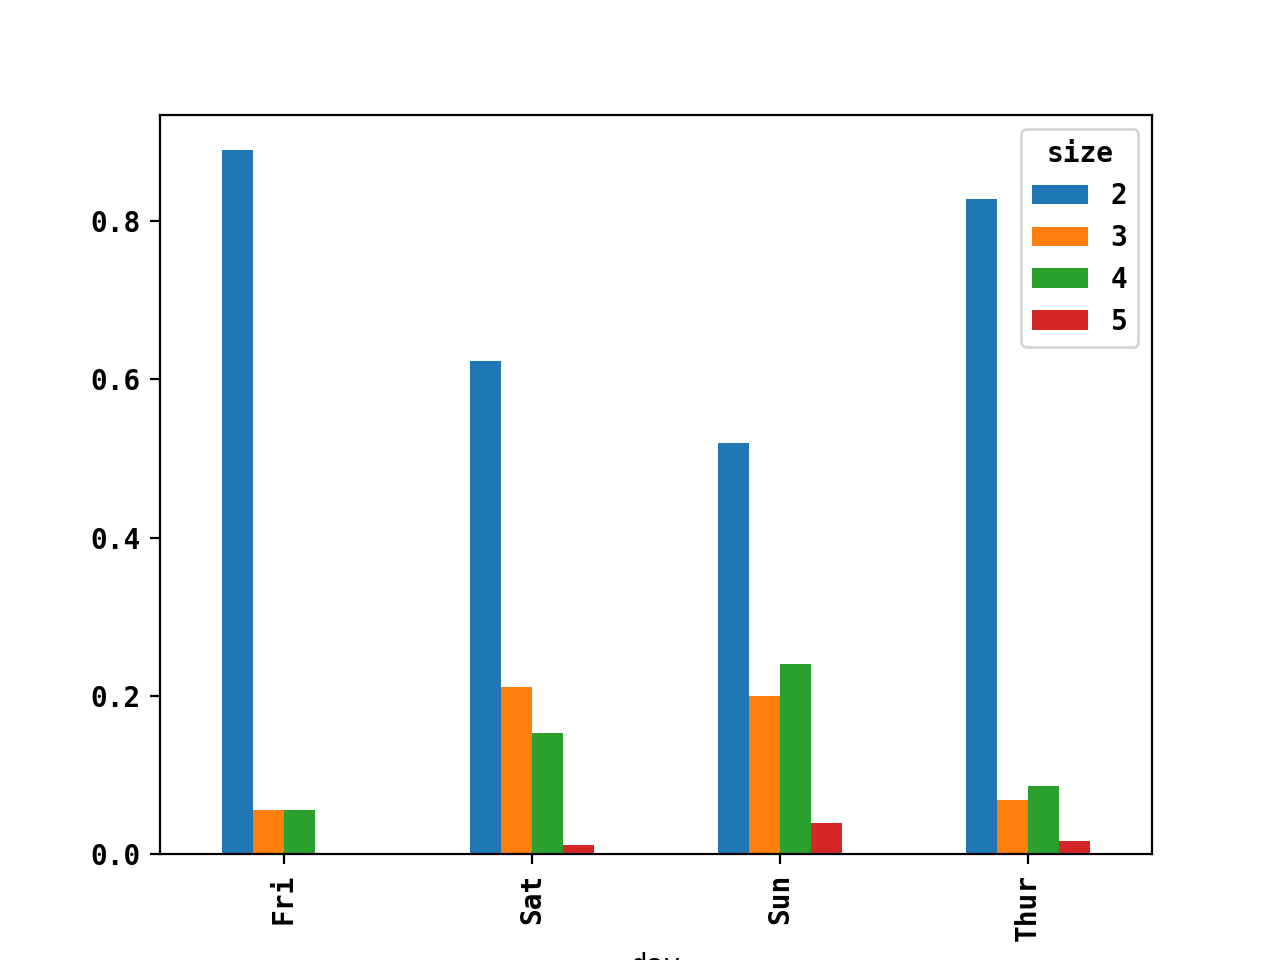

In [84]:
party_pcts.plot.bar()

因此，您可以看到该数据集中周末聚会的人数似乎有所增加。

对于需要在绘制图之前进行汇总或汇总的数据，使用seaborn软件包可以使事情变得简单得多。现在让我们看一下Seaborn每天的小费百分比（结果图见图9-19）：

In [91]:
import seaborn as sns

tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


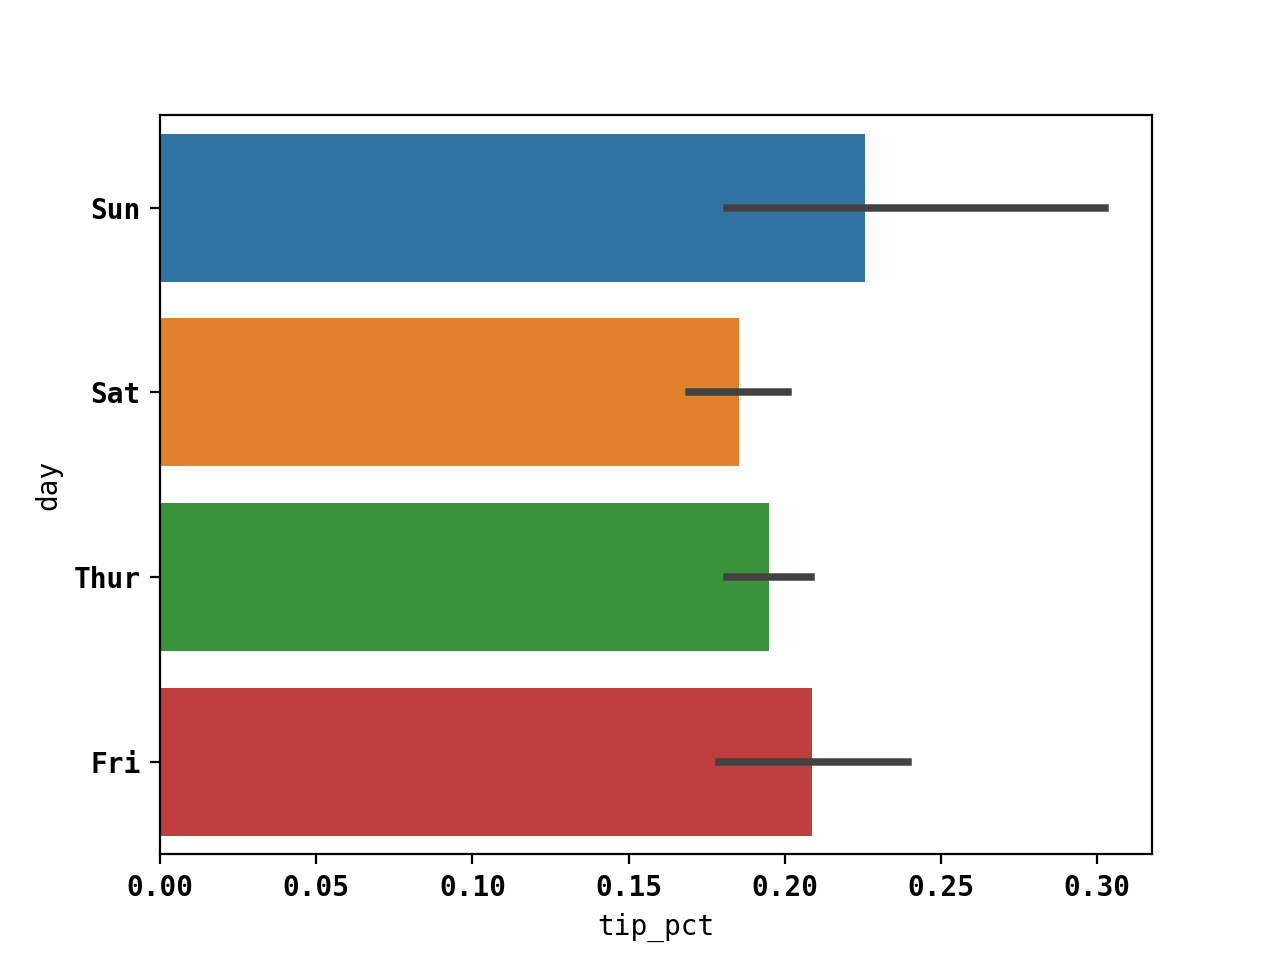

In [92]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

In [93]:
tips[['day', 'tip_pct']].groupby(['day']).mean()

,tip_pct
day,
Fri,0.208598
Sat,0.185305
Sun,0.225718
Thur,0.194818


seaborn中的绘图函数采用数据参数，该参数可以是pandas DataFrame。其他参数引用列名。由于一天中的每个值都有多个观测值，因此条形图是tip_pct的平均值。条上绘制的黑线表示95％置信区间（可以通过可选参数配置）。

seaborn.barplot有一个色相选项，使我们可以按其他分类值进行分割（图9-20）：

<IPython.core.display.Javascript object>


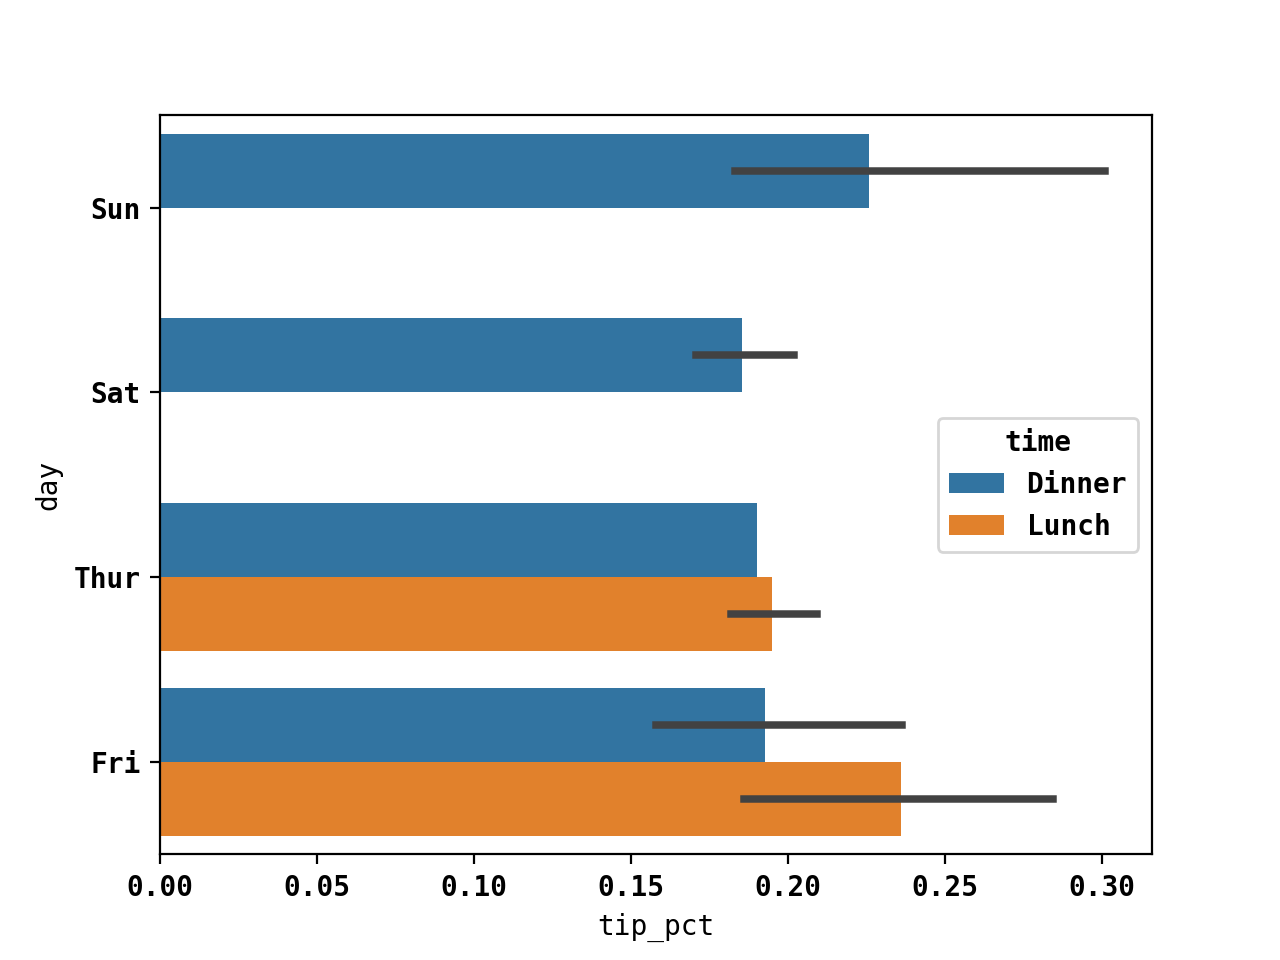

In [94]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

请注意，seaborn自动改变了图的美感：默认调色板，图背景和网格线颜色。 您可以使用seaborn.set在不同的情节外观之间切换：

In [95]:
sns.set(style='whitegrid')

### 直方图和密度图

直方图是一种条形图，可以离散显示值频率。 数据点被分为离散的，等距的条带，并绘制每个条带中的数据点数量。 使用之前的小费数据，我们可以使用Series上的plot.hist方法绘制总账单的小费百分比直方图（见图9-21）：

<IPython.core.display.Javascript object>


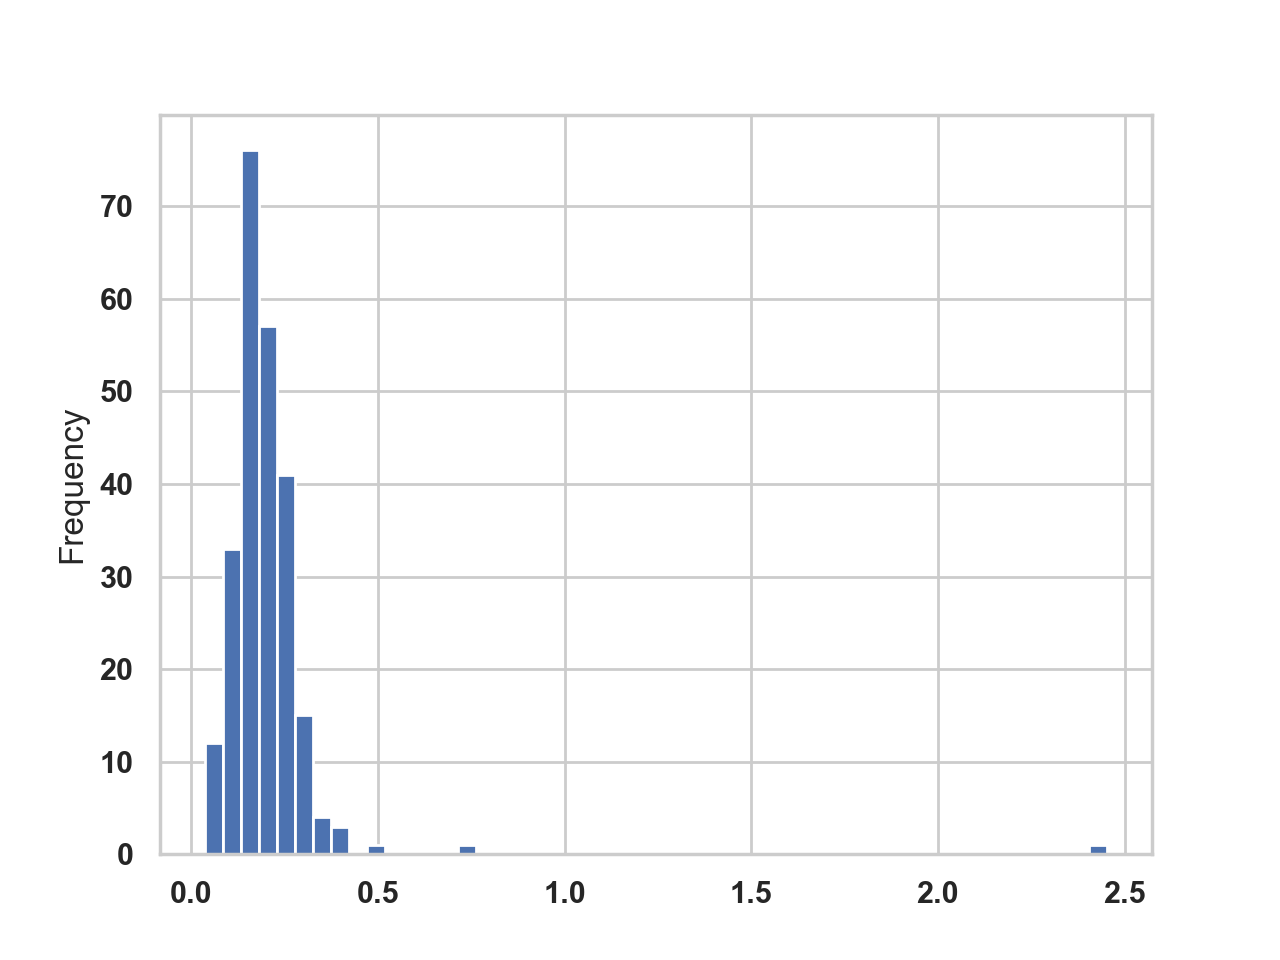

In [96]:
tips['tip_pct'].plot.hist(bins=50)

相关的图类型是密度图，它是通过计算可能已生成观测数据的连续概率分布的估计值而形成的。 通常的过程是将此分布近似为“内核”的混合，即像正态分布一样简单的分布。 因此，密度图也称为内核密度估计（KDE）图。 使用plot.kde使用常规的法线混合估计来绘制密度图（请参见图9-22）：

<IPython.core.display.Javascript object>


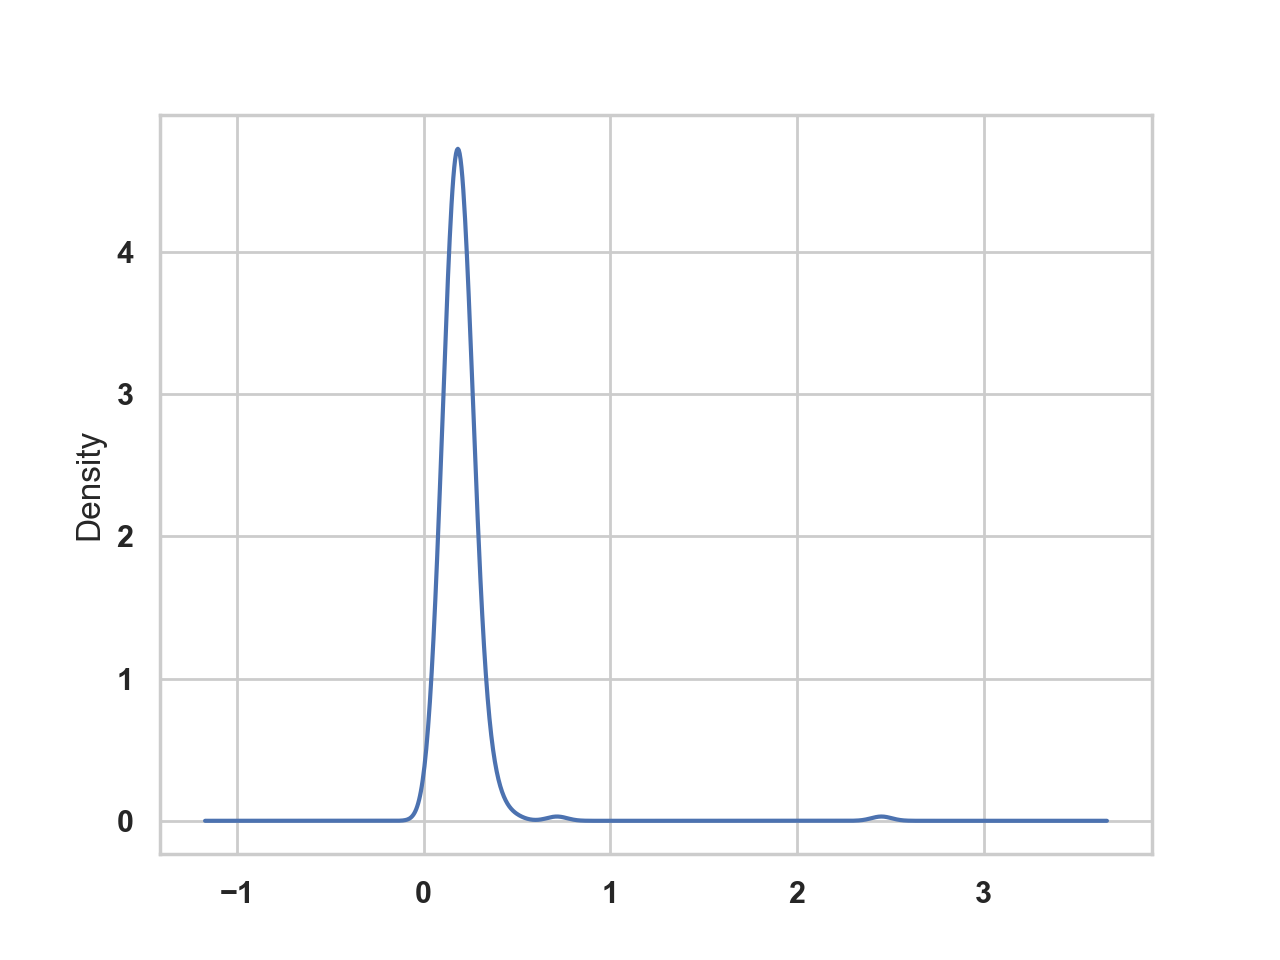

In [97]:
tips['tip_pct'].plot.density()

Seaborn通过其distplot方法使直方图和密度图更加容易，该方法可以同时绘制直方图和连续的密度估计值。 例如，考虑一个双峰分布，它由来自两个不同标准正态分布的绘图组成（见图9-23）：

<IPython.core.display.Javascript object>


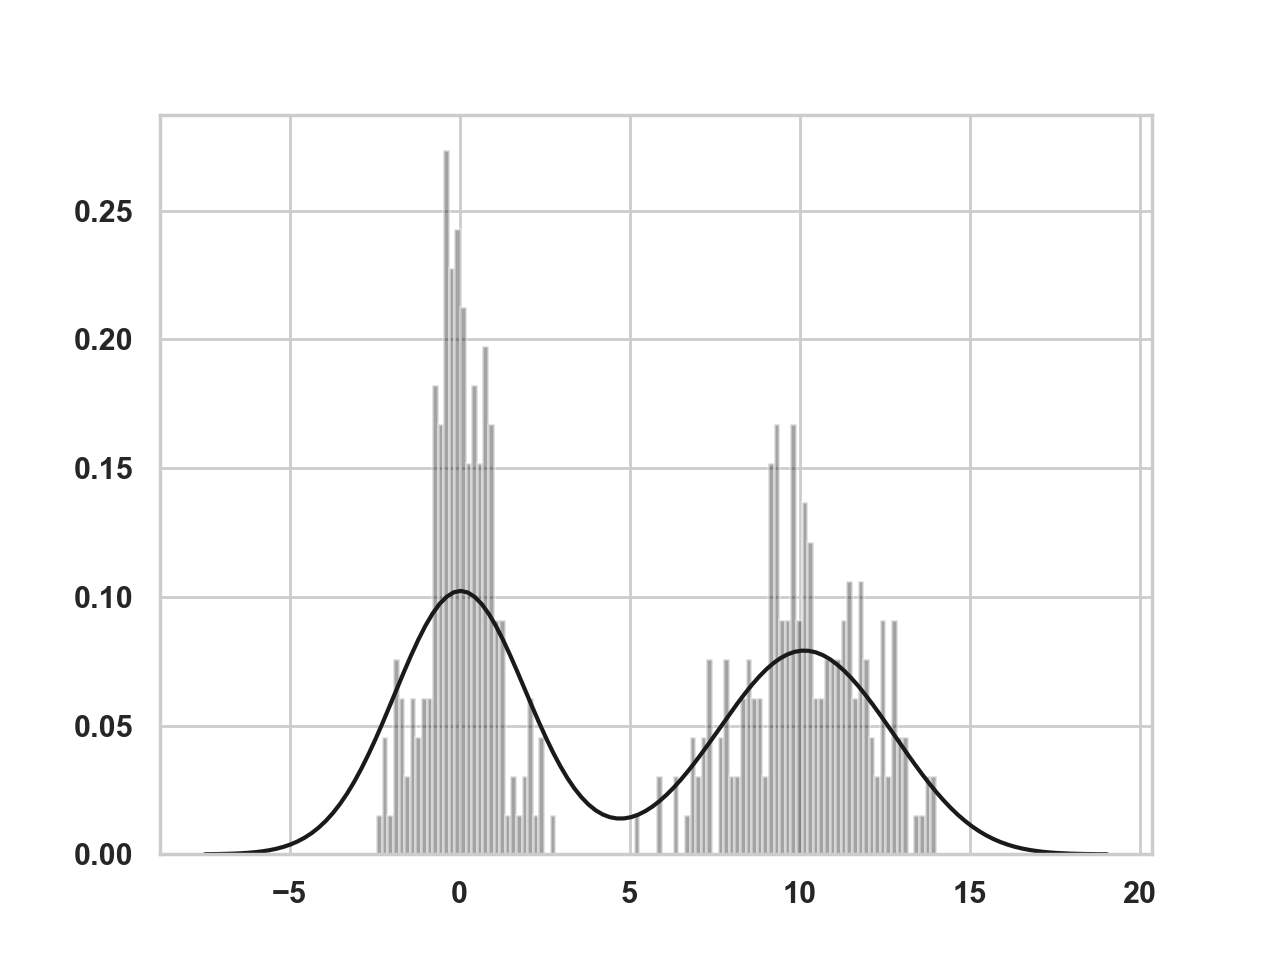

In [98]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### 散点图或点图

点图或散点图可能是检查两个一维数据序列之间关系的有用方法。 例如，这里我们从statsmodels项目中加载宏数据数据集，选择一些变量，然后计算对数差异：

In [102]:
macro = pd.read_csv('examples/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()

trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


然后，我们可以使用seaborn的regplot方法，该方法可以绘制散点图并拟合线性回归线（见图9-24）：

<IPython.core.display.Javascript object>


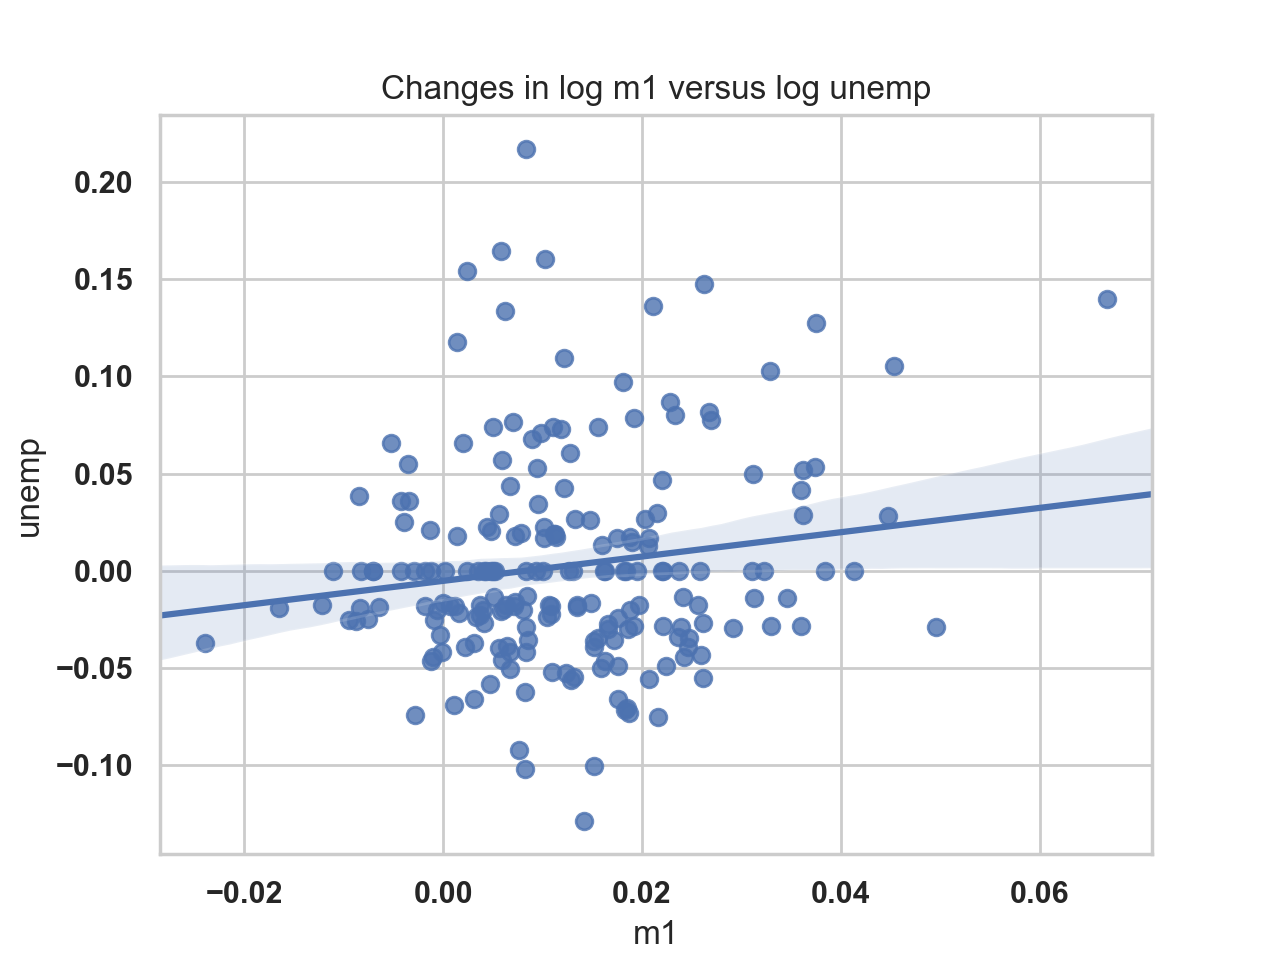

Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

In [103]:
sns.regplot('m1', 'unemp', data=trans_data)
plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

在探索性数据分析中，能够查看一组变量之间的所有散点图会很有帮助； 这称为成对图或散布图矩阵。 从头开始制作这样的图有些麻烦，因此seaborn具有方便的成对图功能，该功能支持沿对角线放置每个变量的直方图或密度估计（结果图见图9-25）：

<IPython.core.display.Javascript object>


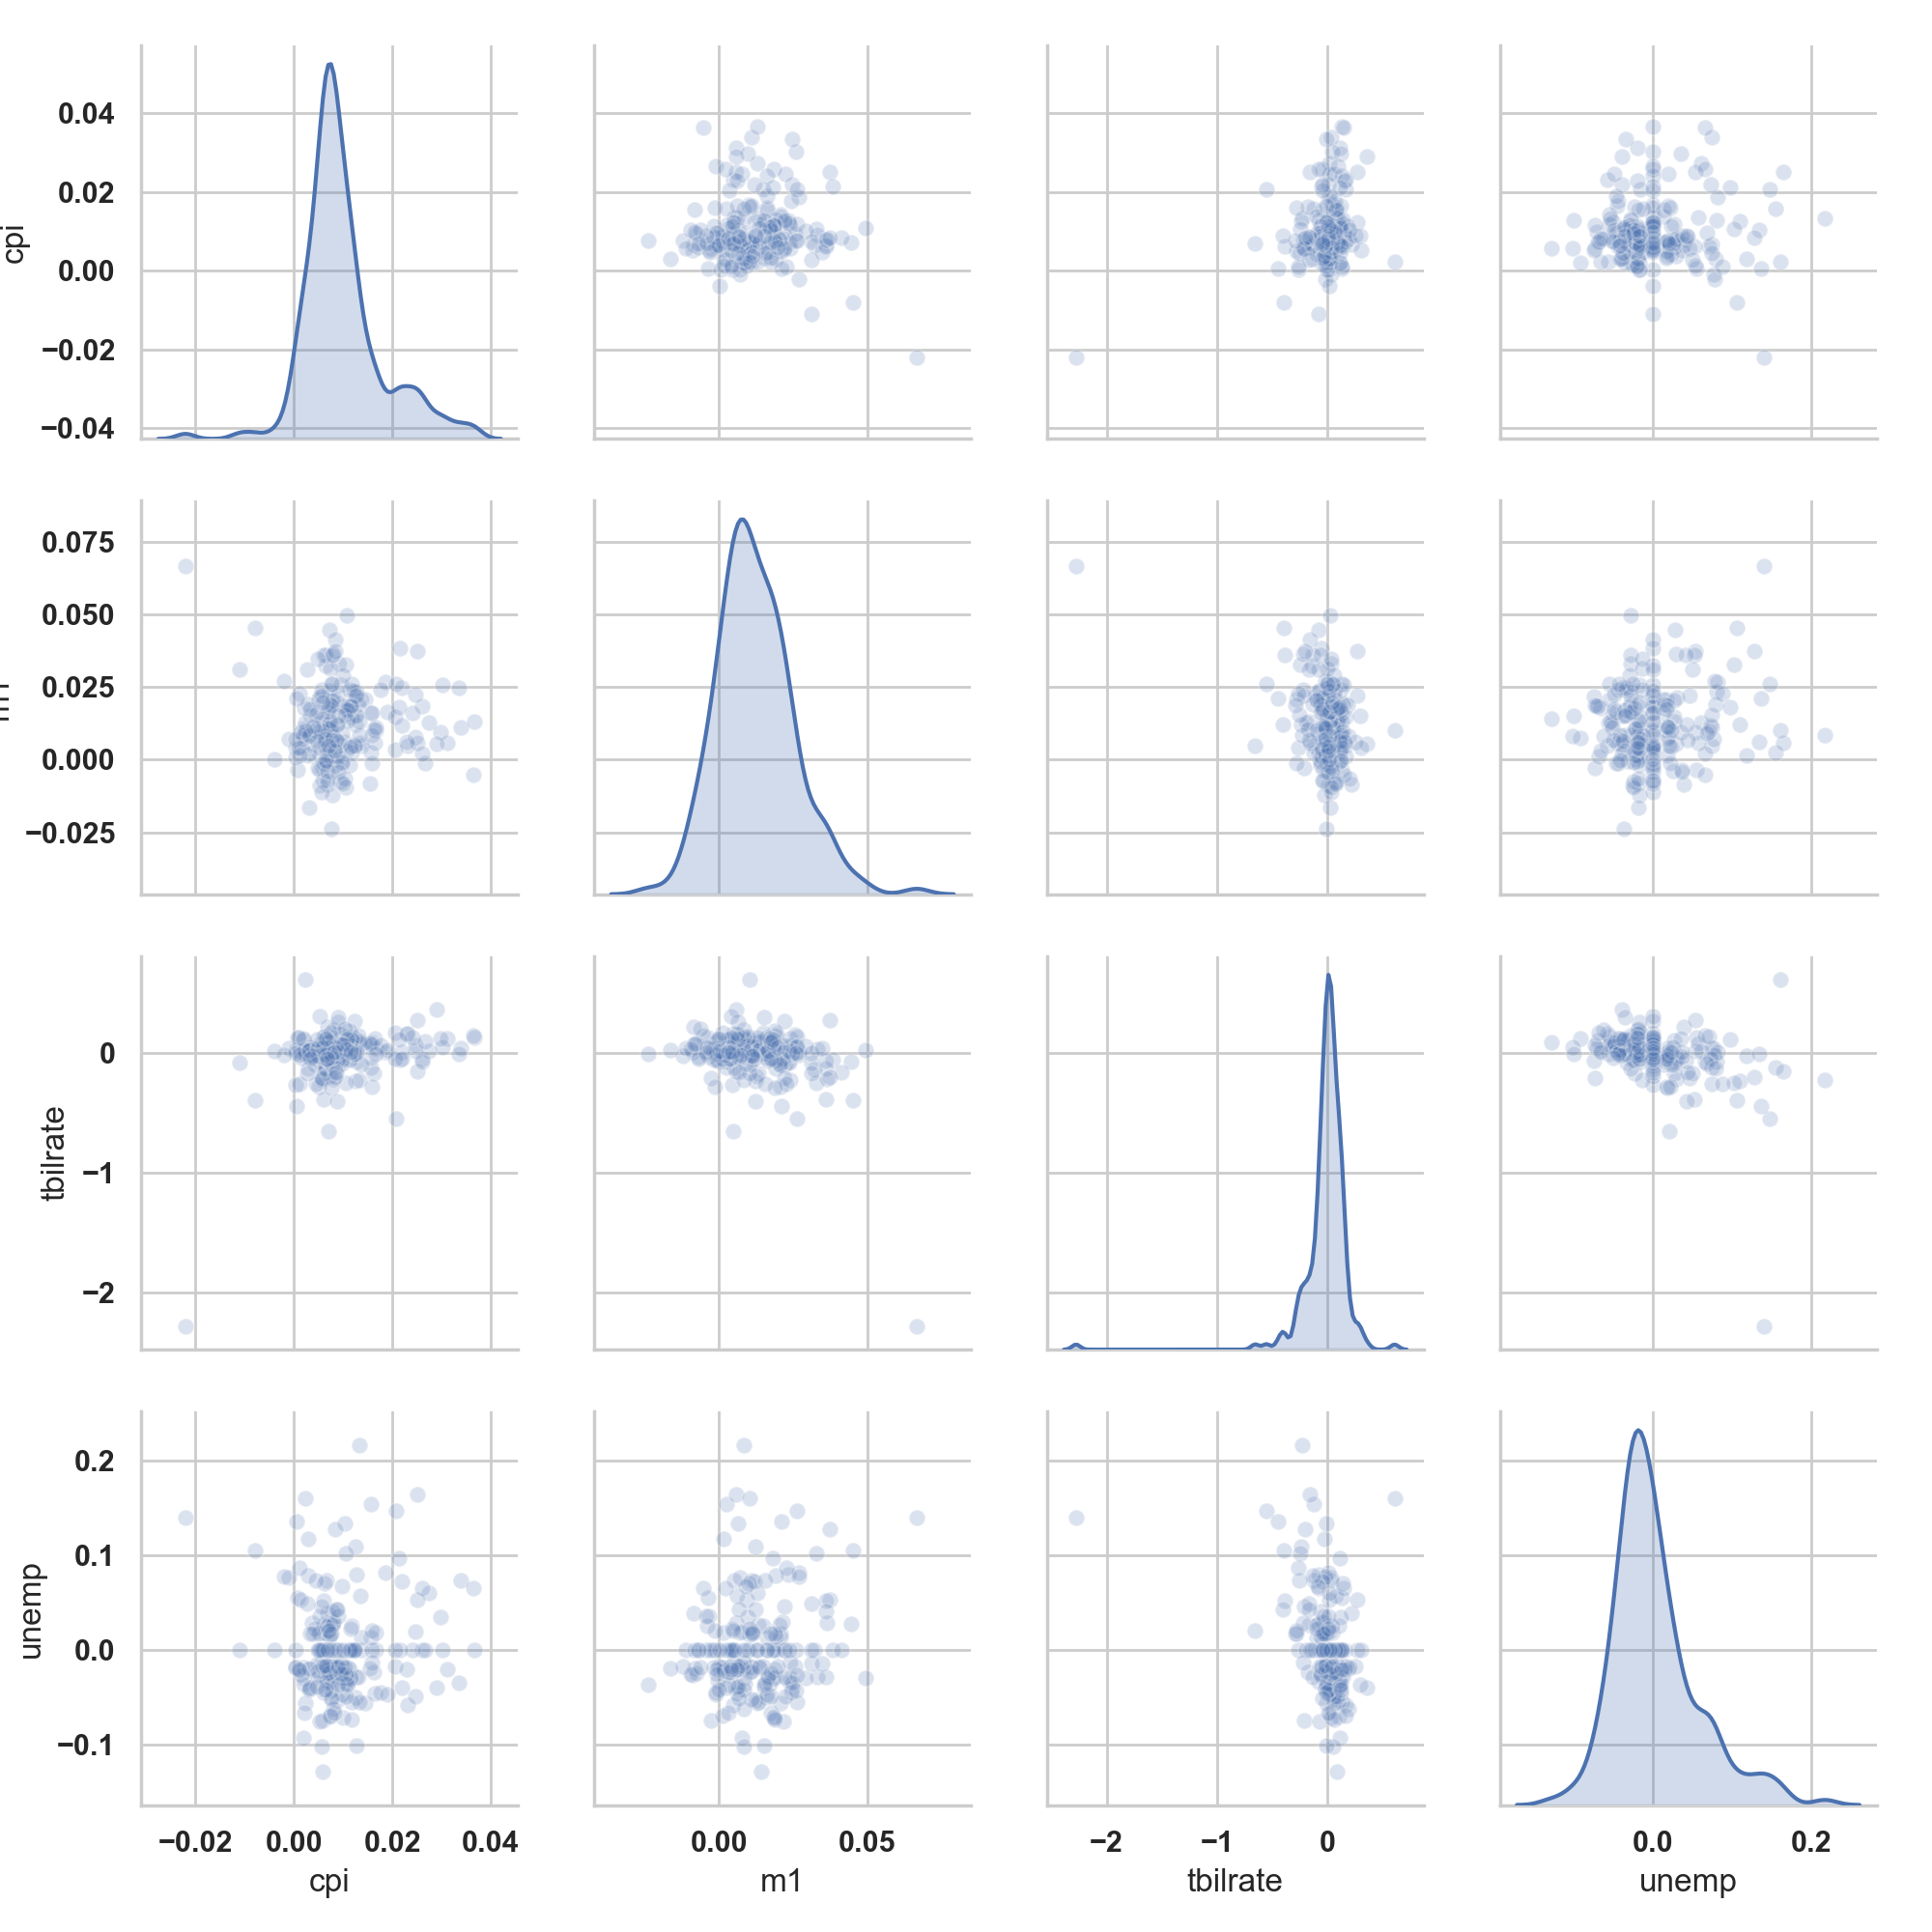

In [104]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

您可能会注意到plot_kws参数。 这使我们能够将配置选项传递给非对角线元素上的各个绘图调用。 请查看seaborn.pairplot文档字符串以获取更详细的配置选项。